# Отчет о работе онлайн-курсов


## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [67]:
### YOUR CODE HERE ###
import pandas as pd
from zipfile import ZipFile, Path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

Таблица df_courses  
id – идентификатор курса  
title – название курса  
field – сфера, к которой относится курс  

In [68]:
zip_file = ZipFile('Data_1.zip')
df_courses = pd.read_csv(zip_file.open('Data/courses.csv'))
df_courses = df_courses.rename(columns = {'id': 'course_id'})
df_courses.head()
# df_courses.info()

,Unnamed: 0,course_id,title,field
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development


Таблица df_prf  
progress_id – идентификатор прогресса  
module_number – номер модуля  
lesson_number – номер урока  
status – статус прохождения урока  
start_date – дата начала  
finish_date – дата окончания  

In [69]:
df_prf = pd.read_csv(zip_file.open('Data/progress_phases.csv'))
df_prf.head()
# df_prf.info() # Отсутствующие данные не удалены

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00


Таблица df_course_cont  
     course_id – идентификатор курса  
     module_number – номер модуля  
     module_title – название модуля  
     lesson_number – номер урока  
     lesson_title – название урока  
     lesson_token – токен урока  
     is_video – наличие видео (true/false)  
     is_homework – наличие домашней работы (true/false)  

In [70]:
df_course_cont = pd.read_csv(zip_file.open('Data/course_contents.csv'))
df_course_cont.head(5)
# df_course_cont.info()

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
3,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,1,Интро,7ea16a2d-e6d1-4158-907f-ae0ce8379c45,True,False
4,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,2,12 принципов анимации,7eea2930-11db-45c9-a16c-0d800b6dc99d,True,False


Таблица df_progresses  
     id – идентификатор прогресса  
     student_id – идентификатор студента  
     course_id – идентификатор курса  

In [71]:
df_progresses = pd.read_csv(zip_file.open('Data/progresses.csv'))
df_progresses = df_progresses.rename(columns = {'id': 'progress_id'})
df_progresses.head()
# df_progresses.info()

,progress_id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9


Таблица df_students  
     id – идентификатор студента  
     city – город студента  
     birthday – день рождения студента  

In [72]:
df_students = pd.read_csv(zip_file.open('Data/students.csv'))
df_students.head(20)
# df_students.info() # Отсутствующие данные не удалены

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN
5,10792,e24062de06d301937b3b3a8e383e3e21,Москва,NaN
6,11058,0b133aa19e40b88587182f23a606cc73,Алматы,NaN
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24
9,12074,49b34a63b37c4e08aee637570106b424,Магнитогорск,NaN


In [73]:
df = df_courses.merge(df_course_cont)
df = df.merge(df_progresses)
df = df.merge(df_prf)
df.head()
df_conv = df.copy(deep=True) #Для задачи №4.
# df.shape #(350677, 16)

Общее количество курсов в датасете = 15


In [74]:
# df.groupby('course_id').agg('count')#.reset_index()['course_id'].value_counts().sum()
df['title'].nunique()

15

Количество модулей на каждом курсе

In [75]:
df.groupby('title').agg({'module_title': 'nunique'})

,module_title
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


Количество уроков в каждом модуле на каждом курсе

In [76]:
df_1 = df.copy(deep = True)
df_1 = df_1.groupby(['title', 'module_title']).agg({'lesson_number': 'nunique'}).reset_index() #Количество уроков по модулям каждого курса
df_1
# df.groupby('course_id').agg({'lesson_title': 'nunique'}) #Общее количество уроков на каждом курсе

,title,module_title,lesson_number
0,Excel Базовый,Визуализация данных Excel,5
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
3,Excel Базовый,Сводные таблицы Excel,5
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5
...,...,...,...
224,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,5
225,Руководитель digital-проектов,Требовательность digital-продюсера,4
226,Руководитель digital-проектов,Управление временем,4
227,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,7


Медианное количество уроков в модуле на каждом курсе

In [77]:
df_1.groupby('title').agg('median')

,lesson_number
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


Количество учеников на каждом курсе

In [78]:
df_count_st = df.copy(deep=True)
df_count_st = df_count_st.groupby('title').agg({'student_id': 'nunique'}).reset_index()
# df['student_id'].nunique()
df_count_st = df_count_st.merge(df[['field', 'title']])
df_count_st = df_count_st.groupby('title').agg('max').reset_index().sort_values('student_id')
# df_count_st.groupby('field').agg('sum')
df_count_st

,title,student_id,field
5,SMM-маркетолог от А до Я,506,Marketing
10,Веб-дизайн Базовый,518,Design
2,Java-разработчик c нуля,581,Development
7,Анимация интерфейсов,598,Design
12,Веб-разработчик,628,Development
14,Руководитель digital-проектов,685,Business
1,Java-разработчик,763,Development
0,Excel Базовый,782,Business
4,PHP-разработчик с 0 до PRO. Часть 1,854,Development
3,JavaScript с нуля,966,Development


Минимальный, максимальный, средний, медианный возраст студентов

In [79]:
df_students['birthday'] = pd.to_datetime(df_students['birthday'], errors='coerce')
df_students

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaT
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaT
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaT
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaT
...,...,...,...,...
43825,124251,a65ccacbe0226b345f195d02e676aa04,NaN,2000-11-21
43826,124338,148f1375e4135e779053a0d4b2a63857,NaN,1999-10-20
43827,124363,05fa419f832fa78ad6e7a5f90b0f71e6,NaN,NaT
43828,124377,9ff58c490f6ee5b013e7f62140ee3d79,NaN,1998-04-18


In [80]:
df_students = df_students.dropna()
def from_date_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_students['age'] = df_students['birthday'].apply(lambda x: from_date_to_age(x))
df_students['age'].astype('int')

df_students

,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,42
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,30
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,34
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,34
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,31
...,...,...,...,...,...
43639,116725,3d7d520c6d739fc8cb844ebdc305743b,Москва,1990-02-21,32
43662,117886,4bc5e1606b9596cdfe2831c2abf91153,Кошкарагай,1919-01-01,103
43703,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03,32
43784,122651,2ea7f5c3346ec6b9b58d7ac15fa9ad61,Хабаровск,1993-04-16,29


In [81]:
df_students = df_students[df_students['age'] > 14] #Удаляем отрицательные значения и значения меньше 14.
df_students['age'].min() #Минимальный возраст - 15 лет
df_students = df_students[df_students['age'] < 100] #Удаляем студентов с возрастом больше ста лет.
df_students['age'].max() #Максимальный возраст - 99 лет
df_students = df_students[df_students['age'] < 80]  #Более вероятная верхняя граница возраста студентов
df_students['age'].max() #Максимальный возраст после удаления возможных выбросов - 77 лет
df_students['age'].median() #Медианный возраст - 31 год
df_students['age'].mean() #Средний возраст - ~32 года

31.82303320902149

Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [82]:
df_students_1 = df_students.rename(columns = {'id': 'student_id'})
df_students_1 = df_students_1[['student_id', 'age']]
df_age = df.copy(deep=True)
df_age = df_age.merge(df_students_1)
df_age.head()

,Unnamed: 0,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date,age
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-03-29 17:02:32.838469+00,2019-04-13 17:32:19.134874+00,24
1,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,2,Где и для чего применяется Java,b3c2b829-aa3f-4607-a829-b74b69071b19,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-05-15 07:40:26.127245+00,2019-06-07 10:23:23.419623+00,24
2,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,3,Как выглядит программный код,c25eac6e-b6bb-4de6-957f-f077f07856fc,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-06-23 09:26:24.471348+00,2019-06-23 09:26:28.11417+00,24
3,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,4,Установка среды разработки,0ac58921-5765-40aa-aec9-544f8313e3f6,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-06-23 09:26:28.137853+00,2019-06-23 09:26:29.900389+00,24
4,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,5,Исправляем готовое приложение,b28da8d8-0a6e-40bd-b01d-d529d1ad260d,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-06-23 09:26:29.920844+00,2019-06-23 09:26:31.510679+00,24


In [83]:
df_age.groupby('title').agg({'age': 'min'}) #Минимальный возраст студентов

,age
title,
Excel Базовый,18
Java-разработчик,17
Java-разработчик c нуля,17
JavaScript с нуля,16
PHP-разработчик с 0 до PRO. Часть 1,16
SMM-маркетолог от А до Я,19
UX-дизайн,17
Анимация интерфейсов,17
Веб-вёрстка для начинающих 2.0,16


In [84]:
df_age.groupby('title').agg({'age': 'max'}) #Максимальный возраст студентов

,age
title,
Excel Базовый,63
Java-разработчик,66
Java-разработчик c нуля,57
JavaScript с нуля,61
PHP-разработчик с 0 до PRO. Часть 1,77
SMM-маркетолог от А до Я,54
UX-дизайн,59
Анимация интерфейсов,53
Веб-вёрстка для начинающих 2.0,61


In [85]:
df_age.groupby('title').agg({'age': 'mean'}) #Средний возраст студентов

,age
title,
Excel Базовый,35.297349
Java-разработчик,31.855813
Java-разработчик c нуля,31.621739
JavaScript с нуля,30.392937
PHP-разработчик с 0 до PRO. Часть 1,33.012876
SMM-маркетолог от А до Я,30.773542
UX-дизайн,32.320424
Анимация интерфейсов,31.823434
Веб-вёрстка для начинающих 2.0,30.567355


In [86]:
df_age.groupby('title').agg({'age': 'median'}) #Медианный возраст студентов

,age
title,
Excel Базовый,35.0
Java-разработчик,31.0
Java-разработчик c нуля,31.0
JavaScript с нуля,30.0
PHP-разработчик с 0 до PRO. Часть 1,32.0
SMM-маркетолог от А до Я,30.0
UX-дизайн,32.0
Анимация интерфейсов,31.0
Веб-вёрстка для начинающих 2.0,30.0


Bar-chart, отражающий количество студентов на каждом курсе.  

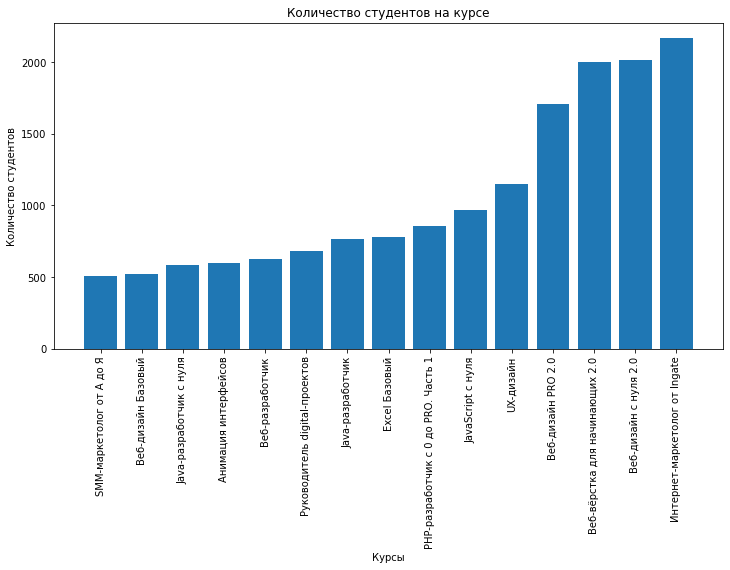

In [87]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(df_count_st['title'], df_count_st['student_id'])
ax.set_title("Количество студентов на курсе")
ax.set_xlabel('Курсы')
ax.set_ylabel('Количество студентов')
ax.tick_params(axis = 'x', rotation = 90)
plt.show()

Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно

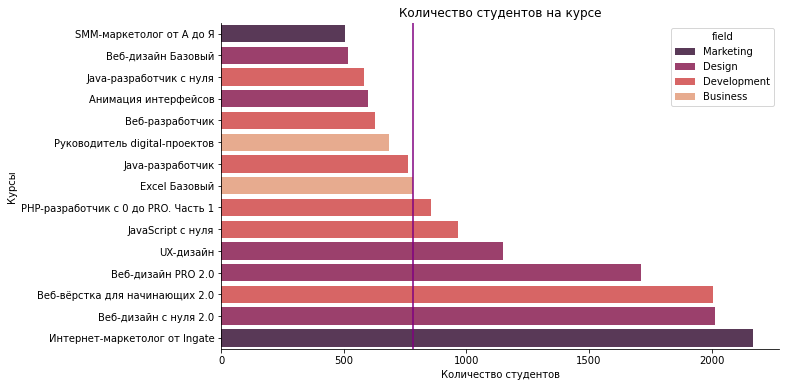

In [88]:
med = df_count_st['student_id'].median() #Медианное количество студентов
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=df_count_st, x='student_id', y='title', ax=ax, hue='field', palette = 'rocket', dodge=False, alpha = 0.9)
ax.axvline(x = med, color = 'purple')
ax.set_title("Количество студентов на курсе")
ax.set_xlabel('Количество студентов')
ax.set_ylabel('Курсы')
# ax.tick_params(axis = 'x', rotation = 90)
sns.despine()
plt.show()

На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

В датасете 15 курсов, в каждом из которых от 8 до 21 модуля. Медианное количество уроков в каждом модуле - от 2 до 12.
Меньше всего студентов на курсе "SMM-маркетолог от А до Я" (212), больше всего на курсе "Веб-дизайн PRO 2.0" (1374). Больше всего студентов в сфере маркетинга на курсе "Интернет-маркетолог от Ingate" (1192), в сфере разработки - "Веб-вёрстка для начинающих 2.0" (1339), в сфере дизайна - "Веб-дизайн PRO 2.0" (1374) , в сфере бизнеса - "Руководитель digital-проектов" (407). 
Больше всего студентов учится на курсах дизайна и разработки, меньше всего - на курсах маркетинга и бизнеса.
На перезапущенных курсах, то есть на курсах версии 2.0, учится больше студентов, чем на других.
Медианный и средний возраста студентов - 31-32 года, минимальный возраст - 15 лет.
На курсах по бизнесу средний и медианный возраста студентов выше (33-35 лет).



## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [357]:
df_growth_3 = df.copy(deep=True)
df_growth_4 = df.copy(deep=True)
df_growth_3 = df_growth_3[['title', 'module_number', 'is_homework']]#Делаем таблицу с названием курсов, модулями и параметром "is_homework" на основании исходной.
df_growth_3 = df_growth_3[df_growth_3['is_homework'] == True] #Выбираем только те случаи, где предусмотрено домашнее задание.
df_growth_3 = df_growth_3.groupby('title').agg({'module_number': 'min'}) #Группируем по названию курсов, выбираем минимальное значение модуля, в котором есть домашняя работа.
df_growth_4 = df_growth_4.merge(df_growth_3, how = 'inner', left_on = ['title', 'module_number'], right_on = ['title', 'module_number']) #Соединяем таблицы.
df_growth_4.head()

,Unnamed: 0,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-03-29 17:02:32.838469+00,2019-04-13 17:32:19.134874+00
1,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,done,2019-06-13 19:22:19.331201+00,2019-06-13 19:51:21.987534+00
2,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,done,2019-03-27 06:56:51.138795+00,2019-03-27 06:56:54.834751+00
3,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,done,2019-05-28 11:09:29.320478+00,2019-05-29 06:47:21.794092+00
4,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,3a79d622c4057c1c029c74e282e43396,72afe01498ba14045467fc32029b650c,done,2019-03-24 07:03:03.582679+00,2019-03-24 09:50:32.595199+00


In [358]:
df_growth_4 = df_growth_4[df_growth_4['is_homework']==True] #Выбираем только те уроки, где есть домашнее задание.
df_growth_4['start_date'] = pd.to_datetime(df_growth_4['start_date'], errors='coerce') 
df_growth_4['year2'] = df_growth_4.start_date.dt.year #Делаем формат "год-месяц"
df_growth_4['month2'] =  df_growth_4.start_date.dt.month
df_growth_4['start_date'] = df_growth_4[['year2', 'month2']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
df_growth_4.head()

,Unnamed: 0,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date,year2,month2
2841,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,start,2019-6,NaN,2019,6
2842,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,done,2019-6,2019-06-23 08:10:42.867492+00,2019,6
2843,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,start,2019-3,NaN,2019,3
2844,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,done,2019-5,2019-06-05 08:06:37.896891+00,2019,5
2845,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,7,Домашняя работа,0ac8c65b-247a-4ffb-beca-c7ba622d092a,False,True,e8be94e53115096efe668ed944e9b52b,e8d90fa64a43ebf9a13fa32d128098bc,start,2019-3,NaN,2019,3


In [359]:
df_growth_4 = df_growth_4.groupby(['title', 'module_number', 'start_date']).agg('count').reset_index() #Группируем по названию, модулю, дате.
df_growth_4.head()

,title,module_number,start_date,Unnamed: 0,course_id,field,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,finish_date,year2,month2
0,Excel Базовый,1,2018-10,30,30,30,30,30,30,30,30,30,30,30,30,29,30,30
1,Excel Базовый,1,2018-11,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
2,Excel Базовый,1,2018-12,43,43,43,43,43,43,43,43,43,43,43,43,41,43,43
3,Excel Базовый,1,2018-2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,Excel Базовый,1,2018-3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3


In [360]:
df_growth_4 = pd.DataFrame(df_growth_4[['title', 'start_date', 'module_number', 'student_id']]) #Сокращаем таблицу.
df_growth_4 = df_growth_4.rename(columns={'student_id': 'growth'}) #Переименовываем столбец.
df_growth_4['start_date'] = pd.to_datetime(df_growth_4['start_date'], errors='coerce') 
df_growth_4.head()

,title,start_date,module_number,growth
0,Excel Базовый,2018-10-01,1,30
1,Excel Базовый,2018-11-01,1,33
2,Excel Базовый,2018-12-01,1,43
3,Excel Базовый,2018-02-01,1,6
4,Excel Базовый,2018-03-01,1,3


In [361]:
df_growth_4['start_date'] = pd.to_datetime(df_growth_4['start_date'], errors='coerce') 
df_growth_4 = df_growth_4.sort_values(['title','start_date']) #Сортируем по названию и дате.
n = 0
for course in title_list: #Добавляем строки с теми месяцами, когда не было прироста.
    df_new = df_growth_4[df_growth_4['title'] == course]
    for i, row in df_new.iterrows():
        m = row['start_date'].month
        y = row['start_date'].year
        if m != n:
            df_growth_4 = df_growth_4.append({'title': row['title'], 'start_date': n, 'module_number': row['module_number'], 'growth': 0}, ignore_index=True) 
        if m+1 != 13:
            n = str(y) + '-' + str(m+1)
            n = datetime.datetime.strptime(n, '%Y-%m')
df_growth_4 = df_growth_4.append({'title': row['title'], 'start_date': n, 'module_number': row['module_number'], 'growth': 0}, ignore_index=True)
df_growth_4

,title,start_date,module_number,growth
0,Excel Базовый,2018-02-01 00:00:00,1,6
1,Excel Базовый,2018-03-01 00:00:00,1,3
2,Excel Базовый,2018-05-01 00:00:00,1,3
3,Excel Базовый,2018-06-01 00:00:00,1,9
4,Excel Базовый,2018-07-01 00:00:00,1,13
...,...,...,...,...
483,Руководитель digital-проектов,2019-03-01 00:00:00,1,0
484,Руководитель digital-проектов,2019-04-01 00:00:00,1,0
485,Руководитель digital-проектов,2019-05-01 00:00:00,1,0
486,Руководитель digital-проектов,2019-06-01 00:00:00,1,0


In [362]:
df_growth_4['start_date'] = pd.to_datetime(df_growth_4['start_date'], errors='coerce') 
df_growth_4 = df_growth_4.drop_duplicates(subset=['title', 'start_date'], keep = 'first') #Убираем лишние строки с дублирующимися датами.
df_growth_4 = df_growth_4.dropna() #Убираем Nan.
df_growth_4 = df_growth_4.sort_values(['title', 'start_date'])
df_growth_4 = df_growth_4.loc[df_growth_4['start_date'] != '2019-08-01']
df_growth_4

,title,start_date,module_number,growth
0,Excel Базовый,2018-02-01,1,6
1,Excel Базовый,2018-03-01,1,3
246,Excel Базовый,2018-04-01,1,0
2,Excel Базовый,2018-05-01,1,3
3,Excel Базовый,2018-06-01,1,9
...,...,...,...,...
240,Руководитель digital-проектов,2019-04-01,1,17
241,Руководитель digital-проектов,2019-05-01,1,25
242,Руководитель digital-проектов,2019-06-01,1,15
243,Руководитель digital-проектов,2019-07-01,1,20


In [363]:
df_growth_4[df_growth_4['title'] == 'Excel Базовый']

,title,start_date,module_number,growth
0,Excel Базовый,2018-02-01,1,6
1,Excel Базовый,2018-03-01,1,3
246,Excel Базовый,2018-04-01,1,0
2,Excel Базовый,2018-05-01,1,3
3,Excel Базовый,2018-06-01,1,9
4,Excel Базовый,2018-07-01,1,13
5,Excel Базовый,2018-08-01,1,15
6,Excel Базовый,2018-09-01,1,40
7,Excel Базовый,2018-10-01,1,30
8,Excel Базовый,2018-11-01,1,33


На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

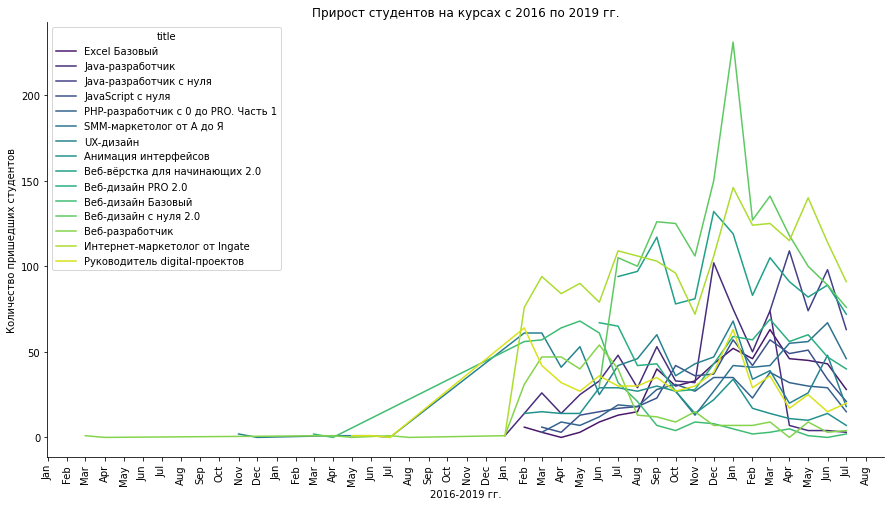

In [381]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot(x="start_date", y="growth", hue="title", data=df_growth_4, ax=ax, palette = "viridis")
ax.set_title("Прирост студентов на курсах с 2016 по 2019 гг.")
ax.set_xlabel('2016-2019 гг.')
ax.set_ylabel('Количество пришедших студентов')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.tick_params(axis = 'x', rotation = 90)
sns.despine()

Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [367]:
#Исправленное решение
df_prog = df.copy(deep = True)
df_prog = df_prog[df_prog['is_homework'] == True]
df_prog['start_date'] = pd.to_datetime(df_prog['start_date'], errors='coerce').dt.date #Переводим значения в формат даты.
df_prog['finish_date'] = pd.to_datetime(df_prog['finish_date'], errors='coerce').dt.date
df_prog['finish_date'] = df_prog['finish_date'].fillna(df_prog['start_date'])
df_prog['finish_date'] = pd.to_datetime(df_prog['finish_date'], errors='coerce').dt.date
df_prog = df_prog.groupby(['title', 'start_date', 'finish_date', 'status']).agg({'progress_id': 'count'}).reset_index() #Группируем значения по названию курса и столбцу с id прогресса, ищем минимальные даты начала выполнения ДЗ и максимальные даты окончания выполнения ДЗ.
df_prog = df_prog[['title', 'start_date', 'finish_date', 'progress_id', 'status']]
df_prog[df_prog['title'] == 'Excel Базовый'].head(5)

,title,start_date,finish_date,progress_id,status
0,Excel Базовый,2018-02-19,2018-02-20,15,done
1,Excel Базовый,2018-02-20,2018-02-24,1,done
2,Excel Базовый,2018-02-21,2018-02-21,9,done
3,Excel Базовый,2018-02-21,2018-02-21,1,start
4,Excel Базовый,2018-02-26,2018-02-26,8,done


In [233]:
f = lambda x: pd.period_range(start=x[0], end=x[1], freq = 'M')
df_prog['between'] = df_prog[['start_date','finish_date']].apply(f, axis=1)
df_prog[df_prog['title'] == 'Excel Базовый'].sort_values('start_date').head(5)

,title,start_date,finish_date,progress_id,status,between
0,Excel Базовый,2018-02-19,2018-02-20,15,done,"PeriodIndex(['2018-02'], dtype='period[M]')"
1,Excel Базовый,2018-02-20,2018-02-24,1,done,"PeriodIndex(['2018-02'], dtype='period[M]')"
2,Excel Базовый,2018-02-21,2018-02-21,9,done,"PeriodIndex(['2018-02'], dtype='period[M]')"
3,Excel Базовый,2018-02-21,2018-02-21,1,start,"PeriodIndex(['2018-02'], dtype='period[M]')"
4,Excel Базовый,2018-02-26,2018-02-26,8,done,"PeriodIndex(['2018-02'], dtype='period[M]')"


In [235]:
df_prog = df_prog.explode('between') #Разбиваем столбец с промежуточными датами, которые содержат дату начала и дату завершения, на несколько строк. 
df_prog[df_prog['title'] == 'Excel Базовый'].sort_values('start_date').head(5)

,title,start_date,finish_date,progress_id,status,between
0,Excel Базовый,2018-02-19,2018-02-20,15,done,2018-02
1,Excel Базовый,2018-02-20,2018-02-24,1,done,2018-02
2,Excel Базовый,2018-02-21,2018-02-21,9,done,2018-02
3,Excel Базовый,2018-02-21,2018-02-21,1,start,2018-02
7,Excel Базовый,2018-02-26,2018-10-23,1,done,2018-09


In [236]:
df_prog = df_prog.groupby(['title', 'between']).agg({'progress_id': 'sum'}).reset_index() #Группируем

In [237]:
#Ответ
df_prog

,title,between,progress_id
0,Excel Базовый,2018-02,37
1,Excel Базовый,2018-03,7
2,Excel Базовый,2018-04,13
3,Excel Базовый,2018-05,17
4,Excel Базовый,2018-06,37
...,...,...,...
253,Руководитель digital-проектов,2019-03,385
254,Руководитель digital-проектов,2019-04,284
255,Руководитель digital-проектов,2019-05,291
256,Руководитель digital-проектов,2019-06,231


In [240]:
df_prog['between'] = pd.to_datetime(df_prog['between'].astype(str), errors='coerce')#Переводим значения в формат datetime.
df_prog

,title,between,progress_id
0,Excel Базовый,2018-02-01,37
1,Excel Базовый,2018-03-01,7
2,Excel Базовый,2018-04-01,13
3,Excel Базовый,2018-05-01,17
4,Excel Базовый,2018-06-01,37
...,...,...,...
253,Руководитель digital-проектов,2019-03-01,385
254,Руководитель digital-проектов,2019-04-01,284
255,Руководитель digital-проектов,2019-05-01,291
256,Руководитель digital-проектов,2019-06-01,231


Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

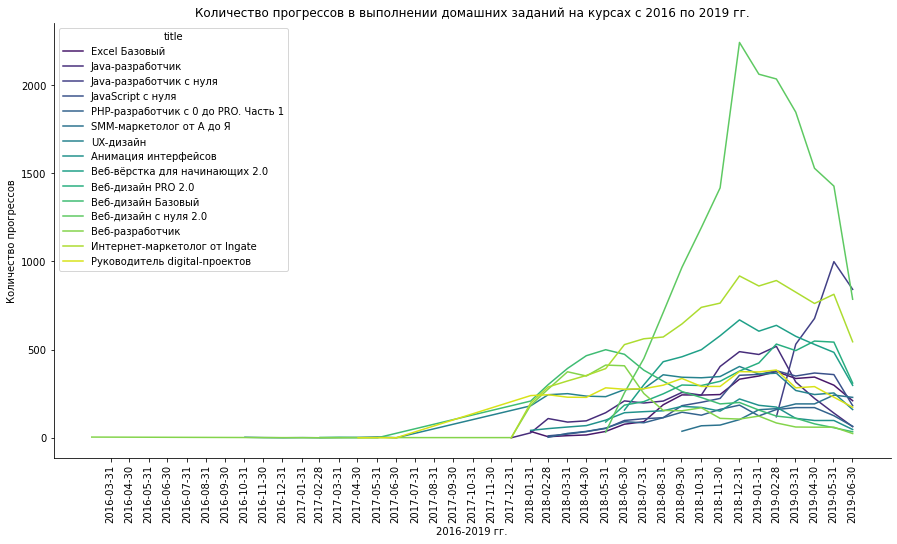

In [243]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot(x="between", y="progress_id", hue="title", data=df_prog, ax=ax, palette = "viridis")
ax.set_title("Количество прогрессов в выполнении домашних заданий на курсах с 2016 по 2019 гг.")
ax.set_xlabel('2016-2019 гг.')
ax.set_ylabel('Количество прогрессов')
ax.tick_params(axis = 'x', rotation = 90)
ax.set_xticks(pd.date_range(start= '2016-3', end = '2019-7', freq='M'))
sns.despine()

На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Наибольший прирост студентов отмечен в январе 2019 года (993 студента), в 2016-2017 гг.прирост студентов был по 1-2 человека в месяц. Начиная с января 2018-го прирост исчисляется сотнями студентов.
Пик прироста студентов на курсе по "Веб-дизайну с нуля 2.0" - 231 человек - пришелся на январь 2019 года. На курсе "Java-разработчик" пик прироста студентов - 102 человека - на  декабрь 2018 года, на курсе "Java-разработчик c нуля" - 70 человек - апрель 2019 года, на курсе "JavaScript с нуля" - 57 человек - январь и март 2018 года, на курсе "PHP-разработчик с 0 до PRO. Часть 1" - 38 человек - март 2019 года, на курсе "SMM-маркетолог от А до Я" - 67 человек - июнь 2019 года, на курсе "UX-дизайн" - 68 человек - январь 2019 года, на курсе "Анимация интерфейсов" - 34 человека - январь 2019 года, на курсе "Веб-верстка для начинающих 2.0" - 132 человека - декабрь 2018 года, на курсе "Веб-дизайн PRO 2.0" - 69 человек - март 2019 года, на курсе "Веб-дизайн Базовый" - 68 человек - май 2018 года, на курсе "Excel Базовый" - 63 человека - март 2019 года, "Веб-разработчик" - 54 человека - июнь 2018 года, на курсе "Интернет-маркетолог от Ingate" - 146 человек - январь 2019 года, на курсе "Руководитель digital-проектов" - 64 человека - февраль 2018 года.	
Активнее всего прирост студентов на курсах "Интернет-маркетолог от Ingate"(1871 человек за весь период) и "Веб-дизайн с нуля 2.0" (1624 человека за весь период). Меньше всего совокупный прирост студентов на курсах "Веб_разработчик" (358) и "Анимация интерфейсов" (342).

Значительный рост прогресса начинается с января 2018 года и каждый месяц вплоть до июля 2019 года значения увеличиваются.

Наибольшее количество записей progress_id было на курсах "Веб-дизайн с нуля 2.0" (16949 записей), "Интернет-маркетолог от Ingate" (10989 записей), "Веб-вёрстка для начинающих 2.0" (6231 записm); наименьшее количество прогрессов было на курсах "Анимация интерфейсов" (2217 записей), "PHP-разработчик с 0 до PRO. Часть 1" (1861 запись), "SMM-маркетолог от А до Я" (1469 записей).


## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [1107]:
### YOUR CODE HERE ###
df_homework = df.copy(deep=True)
df_homework = df_homework[['title', 'module_number', 'student_id', 'lesson_number', 'module_title', 'is_homework', 'status', 'start_date', 'finish_date']]
df_homework['start_date'] = pd.to_datetime(df_homework['start_date'], errors='coerce').dt.date #Переводим значения в формат даты.
df_homework['finish_date'] = pd.to_datetime(df_homework['finish_date'], errors='coerce').dt.date
# df_homework.groupby(['title', 'module_title', 'student_id']).agg({'start_date': 'min'})
# df
df_homework.head()


,title,module_number,student_id,lesson_number,module_title,is_homework,status,start_date,finish_date
0,Java-разработчик c нуля,1,0b4656b84ca60350583f8fbe236dda86,1,Вводный модуль,False,done,2019-03-29,2019-04-13
1,Java-разработчик c нуля,1,1d874e6b6bdc34559781f65f9f761791,1,Вводный модуль,False,done,2019-06-13,2019-06-13
2,Java-разработчик c нуля,1,ab7f5c720e3a5e1de00c2cdbef19fbf0,1,Вводный модуль,False,done,2019-03-27,2019-03-27
3,Java-разработчик c нуля,1,29ab3f8c52a858bea2d3b9a51c433578,1,Вводный модуль,False,done,2019-05-28,2019-05-29
4,Java-разработчик c нуля,1,72afe01498ba14045467fc32029b650c,1,Вводный модуль,False,done,2019-03-24,2019-03-24


In [1108]:
df_homework = df_homework.dropna() #Убираем нулевые значения.
df_homework = df_homework[df_homework['is_homework'] == True] #Отбираем только те строки, где есть домашняя работа.
df_homework_2 = df_homework.copy(deep=True) #Запасной датафрейм для второго графика.

In [1109]:
df_homework = df_homework.groupby(['title', 'module_number', 'student_id']).agg({'start_date': 'min', 'finish_date': 'max'}) #Группируем по названию курса, номеру модуля и "student_id", ищем минимальную дату начала выполнения ДЗ и максимальную дату окончания выполнения ДЗ.
df_homework

start_date  \
title                         module_number student_id                                     
Excel Базовый                 1             001b192f899a84496be98b41906246fc  2019-03-29   
                                            006f0189ec657741ee4d53474c7a258d  2019-01-25   
                                            0074621b6955733338ab0feb2a9a2100  2019-04-10   
                                            0098ca12f73a56dadbf6099389305d80  2019-04-03   
                                            0284a9c2ee0d9c7a97e2a943b0d52b92  2018-07-07   
...                                                                                  ...   
Руководитель digital-проектов 16            e3794e7c0fcef6e0682a6914497f4bf7  2018-11-14   
                                            e3cf05b76236f033304bb99fe2bb7bbd  2018-09-12   
                                            e52d093cb79135e38e420734654ed571  2019-02-21   
                                            e77ebf1f6c9bb45bcc6b0ad5b9c4cba8  2019-02-18   
                                            e947f7450ad2364a6f5c78836a431f2b  2019-04-07   

                                                                             finish_date  
title                         module_number student_id                                    
Excel Базовый                 1             001b192f899a84496be98b41906246fc  2019-03-31  
                                            006f0189ec657741ee4d53474c7a258d  2019-01-26  
                                            0074621b6955733338ab0feb2a9a2100  2019-04-13  
                                            0098ca12f73a56dadbf6099389305d80  2019-04-05  
                                            0284a9c2ee0d9c7a97e2a943b0d52b92  2018-07-09  
...                                                                                  ...  
Руководитель digital-проектов 16            e3794e7c0fcef6e0682a6914497f4bf7  2018-11-19  
                                            e3cf05b76236f033304bb99fe2bb7bbd  2018-10-03  
                                            e52d093cb79135e38e420734654ed571  2019-03-06  
                                            e77ebf1f6c9bb45bcc6b0ad5b9c4cba8  2019-02-25  
                                            e947f7450ad2364a6f5c78836a431f2b  2019-04-09  

[43427 rows x 2 columns]

In [1110]:

df_homework['time_of_hw'] = df_homework.finish_date - df_homework.start_date #Ищем время, затраченное на выполнение ДЗ.
df_homework.groupby(['title', 'module_number']).agg({'time_of_hw': ['min', 'max', 'mean', 'median']}) #Группируем значения по названию курсов и модулю, ищем минимум, максимум, среднее и медианное значения для столбца, отвечающего за время выполнения ДЗ.


time_of_hw           \
                                                   min      max   
title                         module_number                       
Excel Базовый                 1                 0 days 184 days   
                              2                 0 days 185 days   
                              3                 0 days  89 days   
                              4                 0 days 328 days   
                              5                 0 days 176 days   
...                                                ...      ...   
Руководитель digital-проектов 12                0 days 212 days   
                              13                0 days 247 days   
                              14                0 days 199 days   
                              15                0 days 132 days   
                              16                0 days 356 days   

                                                                                
                                                                  mean  median  
title                         module_number                                     
Excel Базовый                 1              6 days 03:21:13.362445414  2 days  
                              2              4 days 10:52:36.650246305  2 days  
                              3              3 days 13:12:33.488372093  2 days  
                              4             10 days 23:55:14.851485148  3 days  
                              5                        7 days 11:01:20  3 days  
...                                                                ...     ...  
Руководитель digital-проектов 12            21 days 10:54:32.727272727  7 days  
                              13            26 days 05:13:02.608695652 12 days  
                              14                      14 days 19:30:00  8 days  
                              15                       6 days 18:22:30  3 days  
                              16            18 days 08:41:22.758620689  7 days  

[190 rows x 4 columns]

На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

In [1111]:
# df_homework = df_homework.reset_index().head()
title_list = list(df_homework.groupby('title').agg('min').reset_index()['title'])
# # title_list = df[df_homework['title']]
title_list


['Excel Базовый',
 'Java-разработчик',
 'Java-разработчик c нуля',
 'JavaScript с нуля',
 'PHP-разработчик с 0 до PRO. Часть 1',
 'SMM-маркетолог от А до Я',
 'UX-дизайн',
 'Анимация интерфейсов',
 'Веб-вёрстка для начинающих 2.0',
 'Веб-дизайн PRO 2.0',
 'Веб-дизайн Базовый',
 'Веб-дизайн с нуля 2.0',
 'Веб-разработчик',
 'Интернет-маркетолог от Ingate',
 'Руководитель digital-проектов']

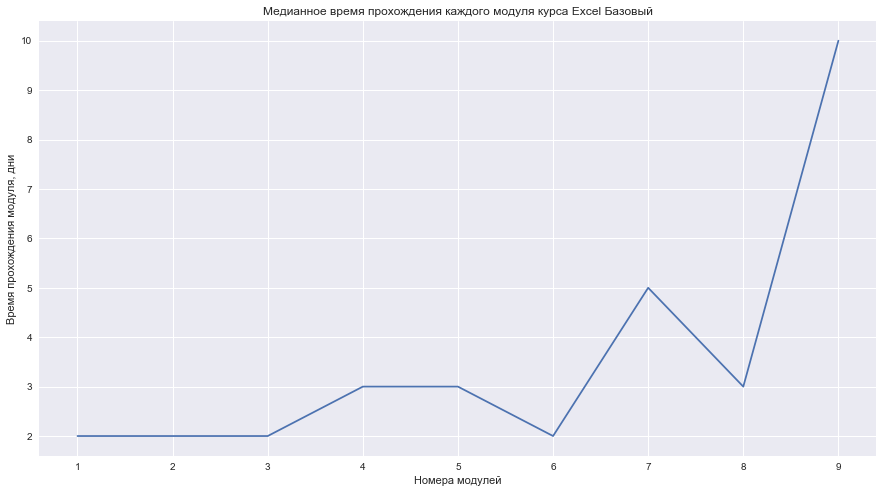

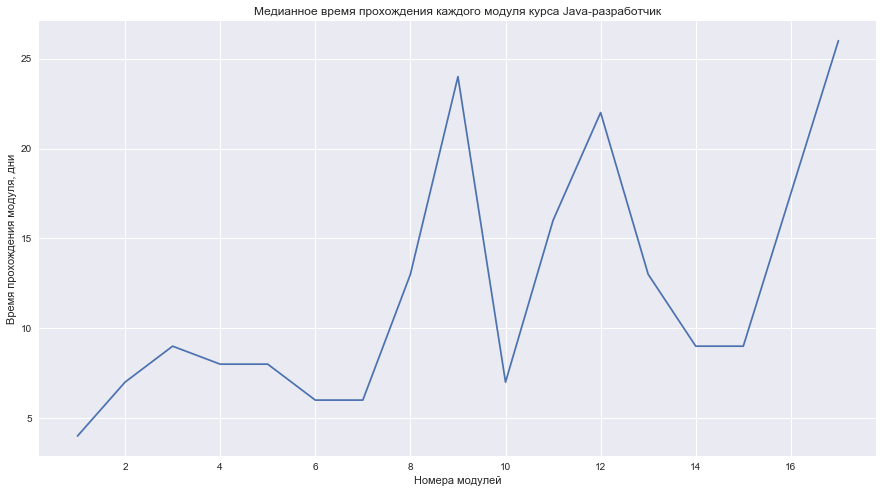

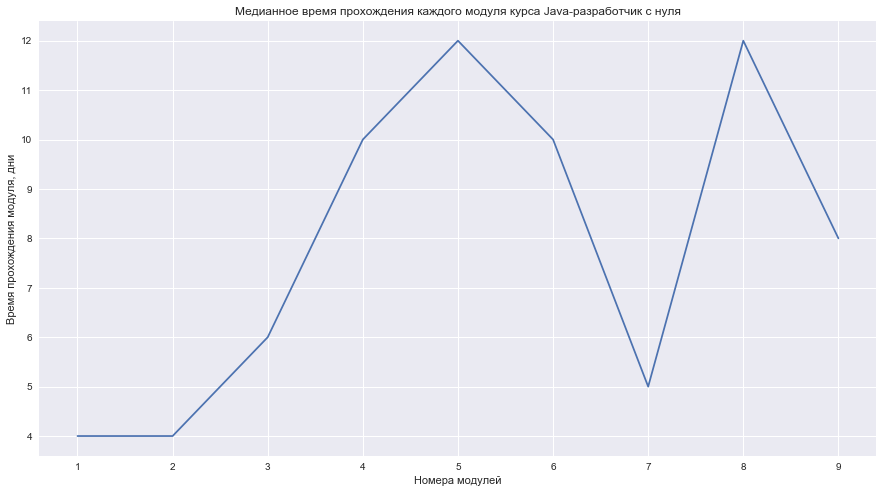

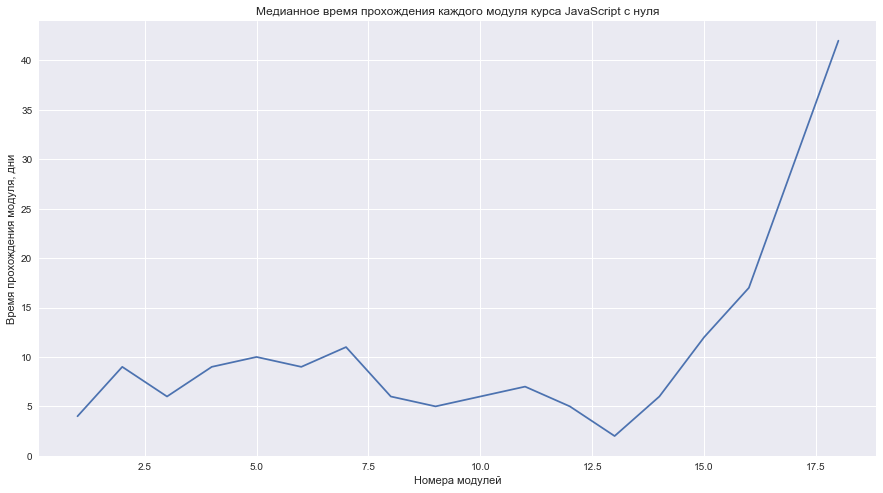

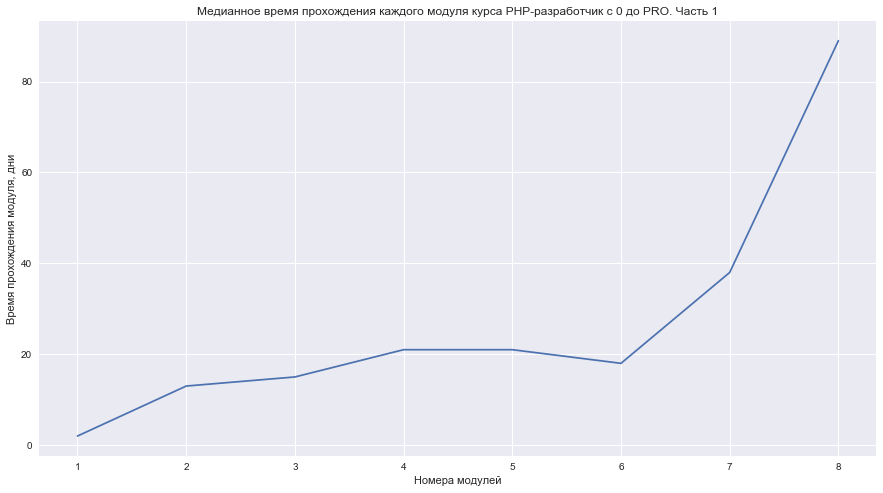

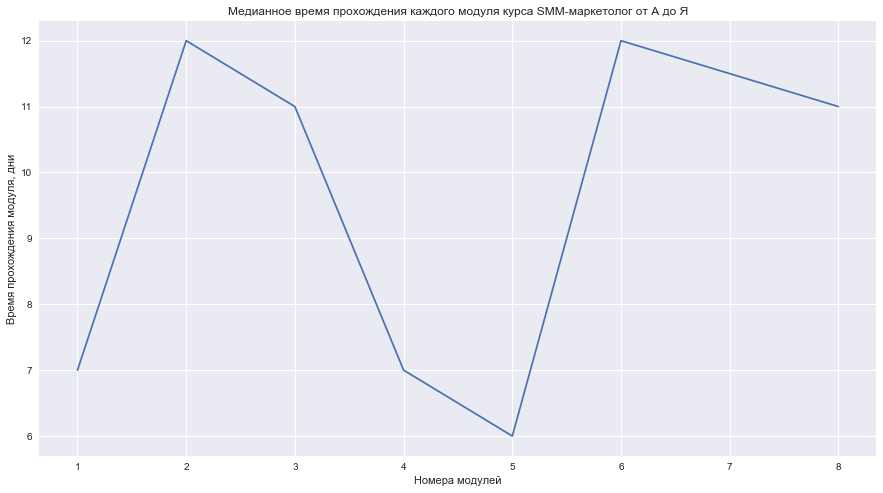

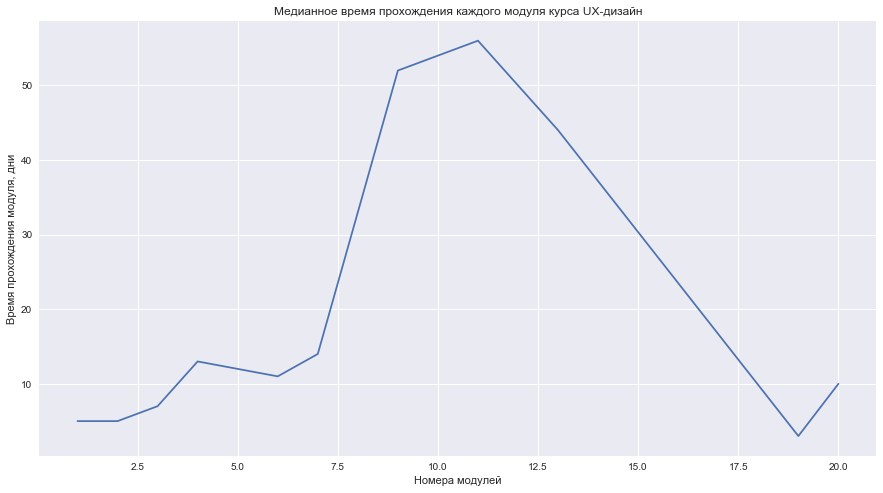

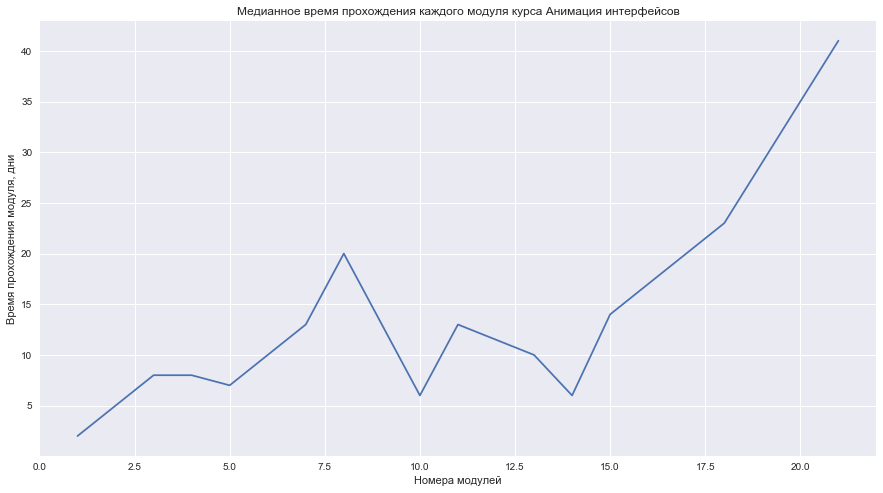

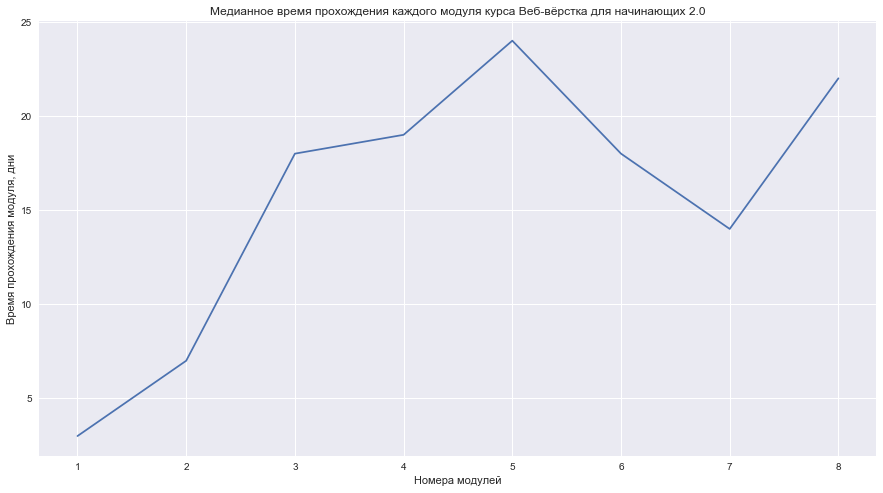

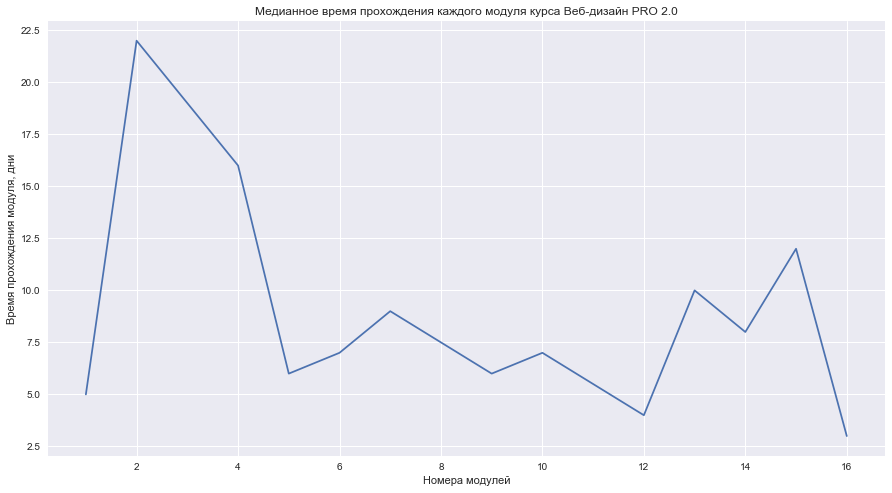

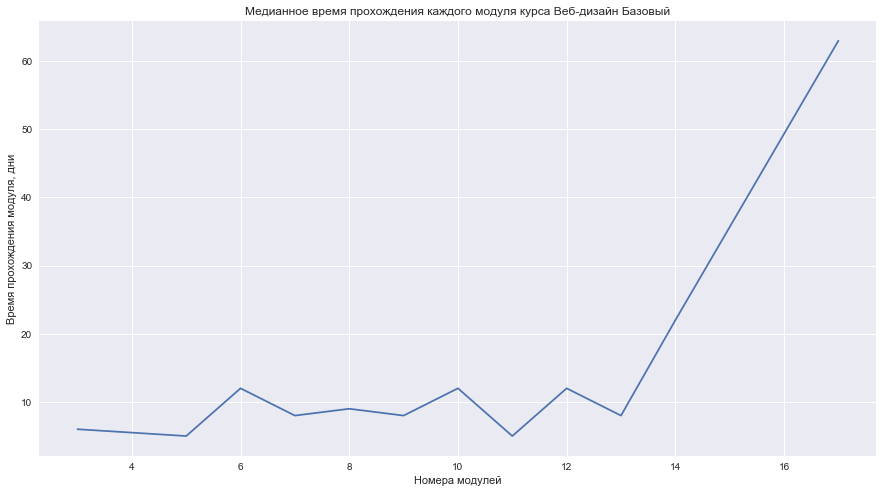

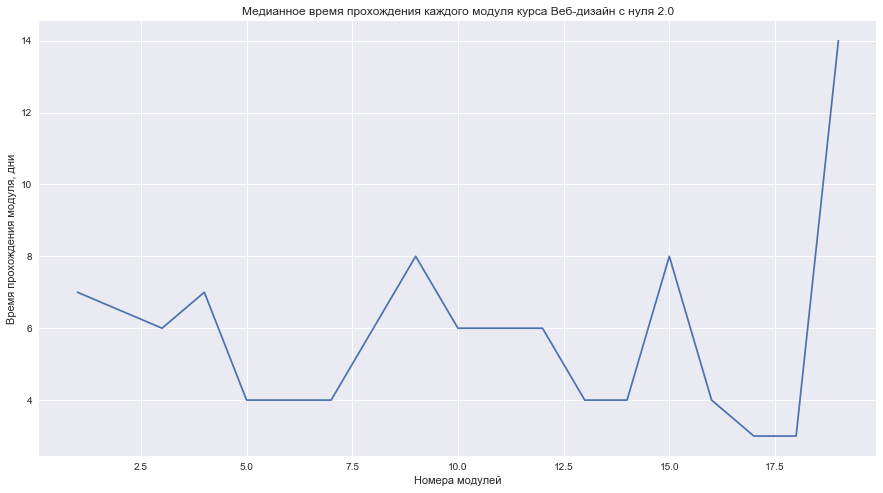

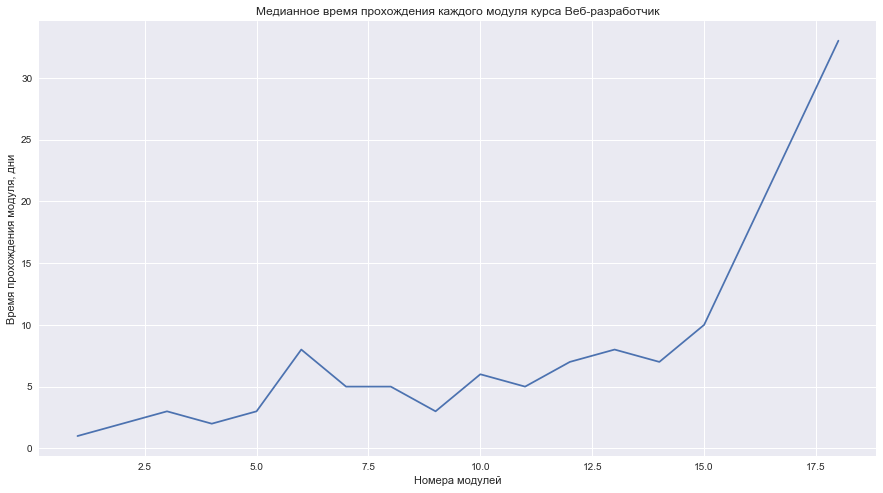

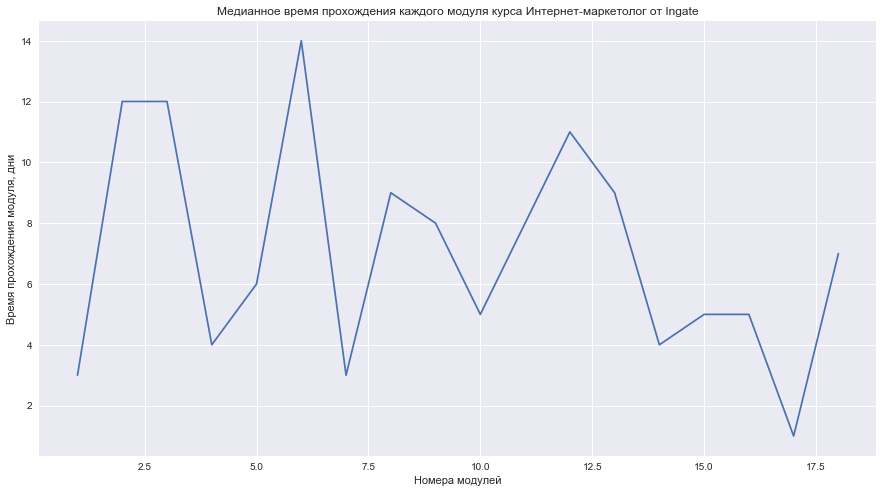

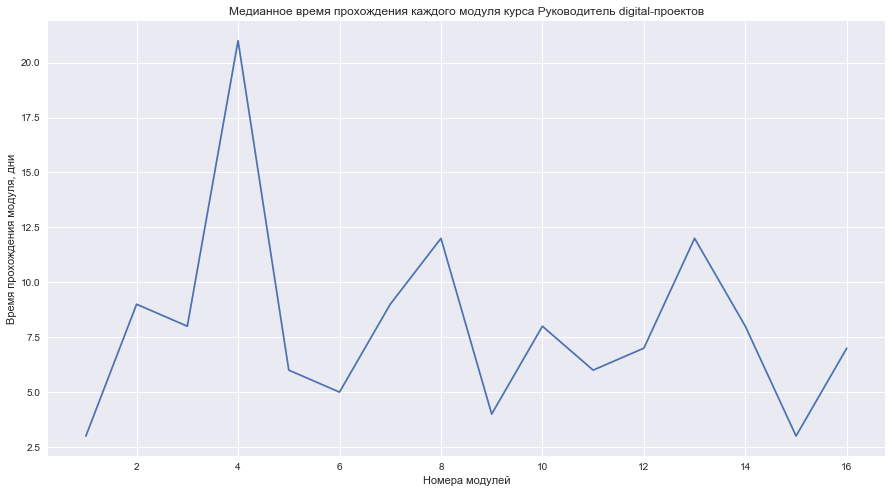

In [1112]:
df_visual = df_homework.groupby(['title', 'module_number']).agg({'time_of_hw': 'median'}).reset_index()
df_visual['time_of_hw'] = df_visual['time_of_hw'].dt.days.astype(int)
#Seaborn-график
for course in title_list:
    fig, ax = plt.subplots(figsize = (15, 8))
    sns.lineplot(x="module_number", y="time_of_hw", data=df_visual[df_visual['title'] == course], ax=ax)
    ax.set_title(f"Медианное время прохождения каждого модуля курсa {course}")
    ax.set_xlabel('Номера модулей')
    ax.set_ylabel('Время прохождения модуля, дни')
    ax.invert_yaxis()
    plt.gca().invert_yaxis()




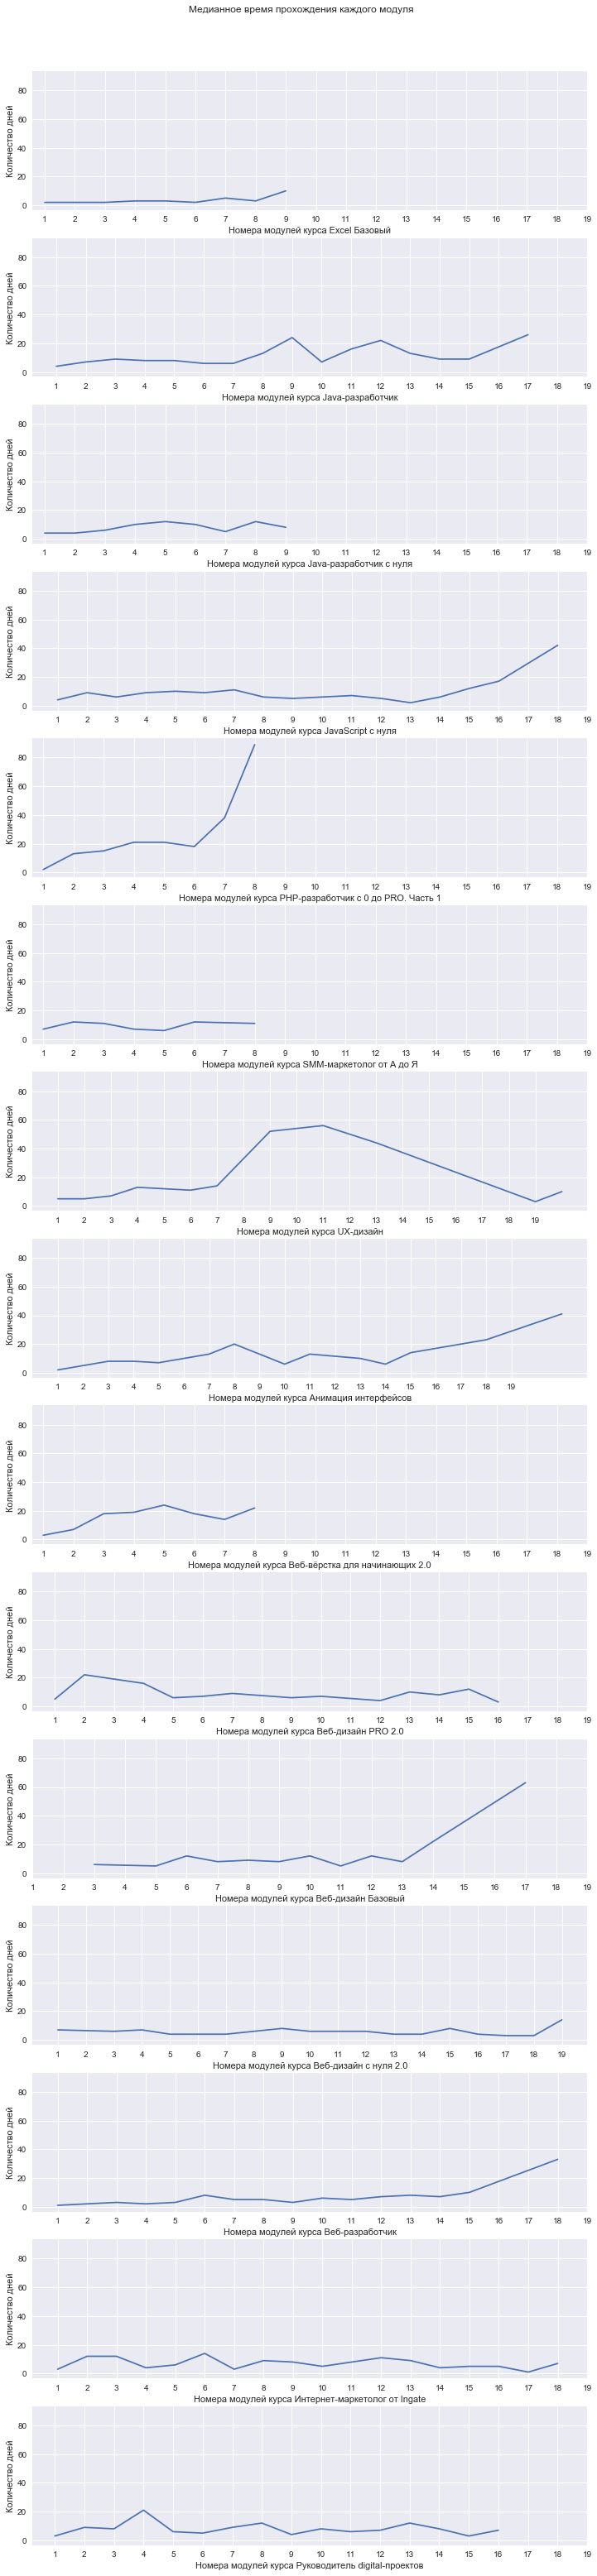

In [1113]:
#Более наглядный вариант графиков
fig, axs = plt.subplots(figsize = (12,55), nrows = 15, sharey = True)
plt.style.use('seaborn')
for ax, i in zip(axs.flat, title_list):
    x = df_visual[df_visual['title'] == i]['module_number']
    y = df_visual[df_visual['title'] == i]['time_of_hw']
    ax.plot(x, y)
    ax.set_xlabel(f'Номера модулей курса {i}')
    ax.set_ylabel('Количество дней')
    ax.set_xticks(range(1,20))
fig.suptitle('Медианное время прохождения каждого модуля', y=0.9)

plt.show()

На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно
Медианное время выполнения каждой домашней работы по месяцам.

In [1114]:
df_homework_2['start_date'] = pd.to_datetime(df_homework_2['start_date']).dt.date #Переводим значения в формат даты.
df_homework_2['finish_date'] = pd.to_datetime(df_homework_2['finish_date']).dt.date

df_homework_2

,title,module_number,student_id,lesson_number,module_title,is_homework,status,start_date,finish_date
2842,Java-разработчик c нуля,1,1d874e6b6bdc34559781f65f9f761791,7,Вводный модуль,True,done,2019-06-16,2019-06-23
2844,Java-разработчик c нуля,1,29ab3f8c52a858bea2d3b9a51c433578,7,Вводный модуль,True,done,2019-05-29,2019-06-05
2846,Java-разработчик c нуля,1,47c3c0e20c441a4fa021ca4bd8044e27,7,Вводный модуль,True,done,2019-03-26,2019-03-28
2847,Java-разработчик c нуля,1,75cc0378d0011cc0dd33756796c5d762,7,Вводный модуль,True,done,2019-04-22,2019-04-24
2848,Java-разработчик c нуля,1,5b8d90aafa6d1cb24e0e520814291812,7,Вводный модуль,True,done,2019-05-08,2019-05-08
...,...,...,...,...,...,...,...,...,...
350668,Java-разработчик,17,8661e5712b6d92685e7e6baac8345640,1,Итоговая тема,True,done,2019-02-19,2019-05-24
350669,Java-разработчик,17,6892b6f4a6ca9aaa01b9fd54eb36c4d1,1,Итоговая тема,True,done,2018-11-16,2018-12-06
350670,Java-разработчик,17,c00a4d12eadaf26f3229f773a1c3a535,1,Итоговая тема,True,done,2018-09-10,2018-09-21
350674,Java-разработчик,17,1e7f607c6c4e1449915ece32352ed58b,1,Итоговая тема,True,done,2019-03-23,2019-03-23


In [1115]:
df_homework_2['month'] = pd.DatetimeIndex(df_homework_2['finish_date']).month #Добавляем столбец с номером месяца
df_homework_2['time_of_hw'] = df_homework_2.finish_date - df_homework_2.start_date #Получаем время, затраченное на выполнение ДЗ.
df_homework_2 = df_homework_2.groupby(['title', 'month']).agg({'time_of_hw': 'median'}).reset_index() #Группируем значения по названию курсов и номеру месяца, ищем медианное значение времени, потраченного на ДЗ.

In [1116]:
df_homework_2['time_of_hw'] = df_homework_2['time_of_hw'].dt.days.astype(int) #Переводим в числовые значения.
df_homework_2

,title,month,time_of_hw
0,Excel Базовый,1,2
1,Excel Базовый,2,2
2,Excel Базовый,3,3
3,Excel Базовый,4,2
4,Excel Базовый,5,3
...,...,...,...
166,Руководитель digital-проектов,8,13
167,Руководитель digital-проектов,9,10
168,Руководитель digital-проектов,10,6
169,Руководитель digital-проектов,11,6


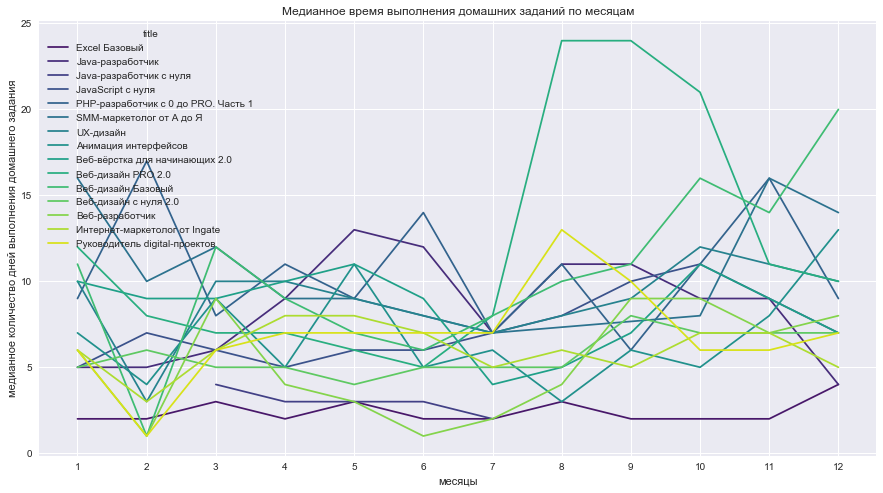

In [1117]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot(x="month", y="time_of_hw", hue="title", data=df_homework_2, ax=ax, palette = "viridis")
ax.set_title("Медианное время выполнения домашних заданий по месяцам")
ax.set_xlabel('месяцы')
ax.set_ylabel('медианное количество дней выполнения домашнего задания')
ax.set_xticks(range(1, 13))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.despine()

На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Перегруженный модуль - модуль, в котором медианное время выполнения задания больше 15 дней.
Перегруженный месяц: если медианное количество дней больше 10, то берутся три последних значения. Если меньше 10, то одно, максимальное.  
На курсе "Excel Базовый" медианное время выполнения заданий занимет два-три дня. Каждое задание за модуль, кроме последнего, возможно выполнить менее чем за день. Восьмой модуль кажется наиболее сложным: на домашнее задание требуется 10 дней (медианное значение). Перегруженных модулей и месяцев нет.
На курсе "Java-разработчик" медианное время выполнения заданий в модулях с 1 по 7, в 10, в 14-15 - от 4 до 9 дней. Перегруженными выглядят модули 9, 11, 12, 17 с медианным временем выполнения заданий от 16 до 26 дней. Каждое задание возможно выполнить менее чем за 1 день. Самые перегруженные месяцы - май, июнь, август, сентябрь.
На курсе "Java-разработчик c нуля" медианное время выполнения заданий в пределах от 4 до 12 дней. Более трудными выглядят домашние задания в модулях 4, 5, 6, 8 (10-12 дней). Минимальное время выполнения всех заданий - от 0 до 2 дней. Перегруженных месяцев нет.
На курсе "JavaScript с нуля" медианное время выполнения домашних заданий в каждом модуле от 2 до 42 дней. 13 модуль самый простой, домашнее задание выполняется за 2 дня.  Перегруженные модули - 16-й и 18-й, на домашнее задание уходит 17 и 42 дня соответственно. Каждое задание, кроме 18 модуля, можно выполнить меньше чем за день. Самые перегруженные месяцы - сентябрь, октябрь.
На курсе "PHP-разработчик с 0 до PRO. Часть 1" медианное время выполнения домашних заданий в каждом модуле от 2 до 89 дней. Перегруженными кажутся модули 3 (15 дней), 4 (21 дней), 5 (21 дней), 6 (18 дня), 7 (38 день), 8 (89 дней). Задания с 1 по 6 модуль можно выполнить менее чем за 1 день. Минимальное время выполнения заданий 7 модуля - 5 дней, 8 модуля- 11 дней. Самые перегруженные месяцы - февраль, апрель, июнь, август, октябрь, ноябрь.
На курсе "SMM-маркетолог от А до Я" медианное время выполнения домашних заданий в каждом модуле от 6 до 12 дней. Перегруженные модули - 3 (15 дней), 6 (16 дней), 2 (17 дней). Минимальное время выполнения заданий - от 0 до 4 дней. Самые перегруженные месяцы - январь, февраль, март, ноябрь, декабрь.
На курсе "UX-дизайн" медианное время выполнения домашних заданий в каждом модуле от 3 до 56 дней. Перегруженными выглядят модули  9 (52 дней), 11 (56 дней), 13 (44 дня). Каждое задание можно выполнить менее чем за 1 день. Самые перегруженные месяцы - январь, март, апрель, октябрь, ноябрь, декабрь.
На курсе "Анимация интерфейсов" медианное время выполнения домашних заданий в каждом модуле от 2 до 41 дня. Перегруженными кажутся модули 8 (20 дней), 18 (23 дня), 21 (41 дней). Минимальное время выполнения заданий с 1 по 18 модуль занимает меньше одного дня, для 21 модуля - 7 дней. Самые перегруженные месяцы - май, декабрь.
На курсе "Веб-вёрстка для начинающих 2.0" медианное время выполнения домашних заданий в каждом модуле от 3 до 24 дней. Перегруженные модули - 3 (18 дней), 4 (19 дней), 5 (24 дня), 6 (18 дней), 8 (дня). Минимальное время выполнения заданий всех модулей, кроме последнего, менее чем 1 день, последний модуль - 2 дня. Самые перегруженные месяцы - январь, апрель, май, октябрь.
На курсе "Веб-дизайн PRO 2.0" медианное время выполнения домашних заданий в каждом модуле от 3 до 23 дней. Перегруженные модули - 2 (22 дня) и 4 (16 дней). Каждое задание можно выполнить за 0-1 день. Самые перегруженные месяцы - январь, август, сентябрь, октябрь, ноябрь, декабрь.
На курсе "Веб-дизайн Базовый" медианное время выполнения домашних заданий в каждом модуле от 5 до 63 дня. Перегруженные модули - 14 (22 дня), 17 (63 день). Каждое задание, кроме последнего модуля, можно выполнить менее чем за 1 день. Минимальное время выполнения последнего задания - 10 дней. Самые перегруженные месяцы - январь, март, август, сентябрь, октябрь, ноябрь, декабрь.
На курсе "Веб-дизайн с нуля 2.0" медианное время выполнения домашних заданий в каждом модуле от 3 до 14 дней. Перегруженных месяцев и модулей нет. Каждое задание возможно выполнить мене чем за 1 день. 
На курсе "Веб-разработчик" медианное время выполнения домашних заданий в каждом модуле от 1 до 33 дней (от 1 до 8 без перегруженного модуля). Перегруженный модуль - 18 (33 дня). Каждое задание возможно выполнить мене чем за 1 день. Перегруженных месяцев нет.
На курсе "Интернет-маркетолог от Ingate" медианное время выполнения домашних заданий в каждом модуле от 1 до 14 дней. Самый легкий модуль - 17-й, самый сложный - 6-й. Каждое задание, кроме последнего, возможно выполнить мене чем за 1 день. Минимальное время выполнения последнего задания - 1 день. Перегруженных месяцев нет.
На курсе "Руководитель digital-проектов" медианное время выполнения домашних заданий в каждом модуле от 3 до 21 дней. Перегруженный модуль - 4 (21 день). Каждое задание возможно выполнить менее чем за 1 день. Перегруженные месяцы - август, сентябрь.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [1443]:
# ### YOUR CODE HERE ###
#Первое решение. За первое ДЗ в модуле принимается то ДЗ, к которому студент приступил раньше.
df_a = df[df['is_homework'] == True] #Выбираем только те уроки, в которых есть домашние задания.
df_a = df_a.groupby(['title', 'module_number', 'student_id']).agg({'start_date': 'min'}).reset_index() #Отбираем первые дз, которые были выполнены студентом (вариант с первым ДЗ в модуле будет ниже, после графиков).
df_a

,title,module_number,student_id,start_date
0,Excel Базовый,1,001b192f899a84496be98b41906246fc,2019-03-29 20:43:08.914029+00
1,Excel Базовый,1,006f0189ec657741ee4d53474c7a258d,2019-01-25 03:25:26.690241+00
2,Excel Базовый,1,0074621b6955733338ab0feb2a9a2100,2019-04-10 14:09:35.364174+00
3,Excel Базовый,1,0098ca12f73a56dadbf6099389305d80,2019-04-03 11:06:03.164368+00
4,Excel Базовый,1,0203a4ab8610441e866932fb899ed583,2019-05-08 16:24:20.71068+00
...,...,...,...,...
52772,Руководитель digital-проектов,16,e3794e7c0fcef6e0682a6914497f4bf7,2018-11-14 10:45:17.961606+00
52773,Руководитель digital-проектов,16,e3cf05b76236f033304bb99fe2bb7bbd,2018-09-12 11:13:36.657431+00
52774,Руководитель digital-проектов,16,e52d093cb79135e38e420734654ed571,2019-02-21 08:36:48.21167+00
52775,Руководитель digital-проектов,16,e77ebf1f6c9bb45bcc6b0ad5b9c4cba8,2019-02-18 14:50:33.038021+00


In [1444]:
df_final = df_a.groupby(['title', 'module_number']).agg({'student_id': 'count'}).reset_index() #Считаем количество студентов начавших и закончивших выполнение ДЗ, то есть безотносительно к статусу "start"/"done".
df_final

,title,module_number,student_id
0,Excel Базовый,1,518
1,Excel Базовый,2,434
2,Excel Базовый,3,398
3,Excel Базовый,4,345
4,Excel Базовый,5,298
...,...,...,...
186,Руководитель digital-проектов,12,95
187,Руководитель digital-проектов,13,87
188,Руководитель digital-проектов,14,71
189,Руководитель digital-проектов,15,66


In [1445]:
df_final = df_final.rename(columns={'student_id': 'start_count'}) # Переименовывем столбец
df_final

,title,module_number,start_count
0,Excel Базовый,1,518
1,Excel Базовый,2,434
2,Excel Базовый,3,398
3,Excel Базовый,4,345
4,Excel Базовый,5,298
...,...,...,...
186,Руководитель digital-проектов,12,95
187,Руководитель digital-проектов,13,87
188,Руководитель digital-проектов,14,71
189,Руководитель digital-проектов,15,66


In [1446]:
df_b = df[df['is_homework'] == True]
df_b['finish_date'] = pd.to_datetime(df_b['finish_date'], errors='coerce').dt.date
df_b = df_b.dropna() #Удаляем NaT, то есть все случаи, когда ДЗ не сдано.
df_b = df_b[df_b['status'] == 'done'] #На всякий случай.
df_b = df_b.groupby(['title', 'module_number', 'student_id']).agg({'finish_date': 'max'}).reset_index() #Отбираем последние ДЗ, выполненные студентов в модуле (вариант с последним ДЗ в модуле ниже)
df_b = df_b.groupby(['title', 'module_number']).agg({'student_id': 'count'}).reset_index() #Считаем количество студентов, сдавших ДЗ.
df_final['finish_count'] = df_b['student_id'] #Переносим данные в финальную таблицу.
df_final

,title,module_number,start_count,finish_count
0,Excel Базовый,1,518,458.0
1,Excel Базовый,2,434,406.0
2,Excel Базовый,3,398,387.0
3,Excel Базовый,4,345,303.0
4,Excel Базовый,5,298,270.0
...,...,...,...,...
186,Руководитель digital-проектов,12,95,69.0
187,Руководитель digital-проектов,13,87,64.0
188,Руководитель digital-проектов,14,71,64.0
189,Руководитель digital-проектов,15,66,58.0


In [1447]:
df_final['prev_finish_count'] = np.ones #Создаем столбец, в котором будут значения предыдущего модуля.
for ind, row in df_final.iterrows():
    if row['module_number'] == 1:
        df_final['prev_finish_count'][ind] = df_final['start_count'][ind]
        prev = row['finish_count']
    else:
        df_final['prev_finish_count'][ind] = prev
        prev = row['finish_count']
        
df_final

,title,module_number,start_count,finish_count,prev_finish_count
0,Excel Базовый,1,518,458.0,518
1,Excel Базовый,2,434,406.0,458.0
2,Excel Базовый,3,398,387.0,406.0
3,Excel Базовый,4,345,303.0,387.0
4,Excel Базовый,5,298,270.0,303.0
...,...,...,...,...,...
186,Руководитель digital-проектов,12,95,69.0,88.0
187,Руководитель digital-проектов,13,87,64.0,69.0
188,Руководитель digital-проектов,14,71,64.0,64.0
189,Руководитель digital-проектов,15,66,58.0,64.0


In [1449]:
df_final.loc[113, 'prev_finish_count'] = 407 #Изменяем значение в курсе, в котором ДЗ начинаются не с первого модуля.
df_final[df_final['title'] == 'Веб-дизайн Базовый']

,title,module_number,start_count,finish_count,prev_finish_count
113,Веб-дизайн Базовый,3,407,324.0,407
114,Веб-дизайн Базовый,5,338,278.0,324.0
115,Веб-дизайн Базовый,6,321,249.0,278.0
116,Веб-дизайн Базовый,7,274,232.0,249.0
117,Веб-дизайн Базовый,8,249,212.0,232.0
118,Веб-дизайн Базовый,9,230,181.0,212.0
119,Веб-дизайн Базовый,10,213,172.0,181.0
120,Веб-дизайн Базовый,11,183,155.0,172.0
121,Веб-дизайн Базовый,12,175,149.0,155.0
122,Веб-дизайн Базовый,13,157,122.0,149.0


In [1450]:
df_final['conversion'] = df_final.start_count / df_final.prev_finish_count #Создаем столбец и считаем конверсию.
df_final['module_number'] = df_final['module_number'].astype(str)
df_final

,title,module_number,start_count,finish_count,prev_finish_count,conversion
0,Excel Базовый,1,518,458.0,518,1.0
1,Excel Базовый,2,434,406.0,458.0,0.947598
2,Excel Базовый,3,398,387.0,406.0,0.980296
3,Excel Базовый,4,345,303.0,387.0,0.891473
4,Excel Базовый,5,298,270.0,303.0,0.983498
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,95,69.0,88.0,1.079545
187,Руководитель digital-проектов,13,87,64.0,69.0,1.26087
188,Руководитель digital-проектов,14,71,64.0,64.0,1.109375
189,Руководитель digital-проектов,15,66,58.0,64.0,1.03125


Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно

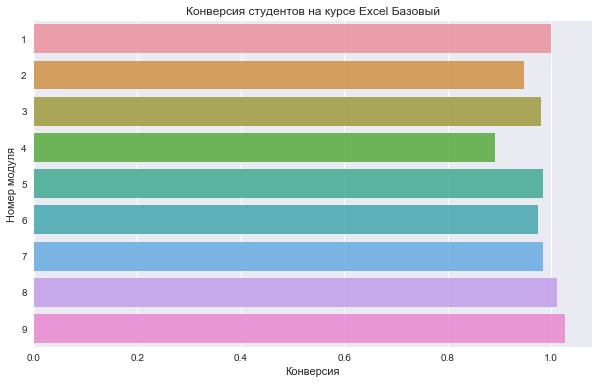

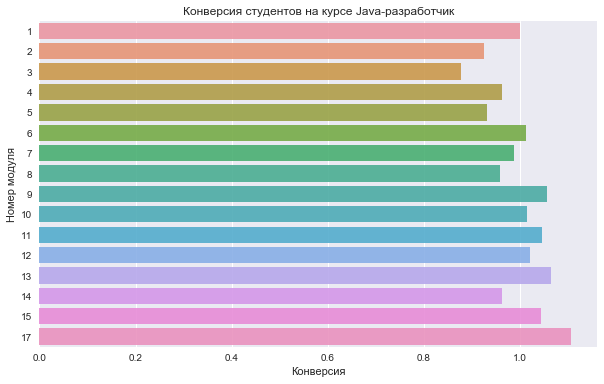

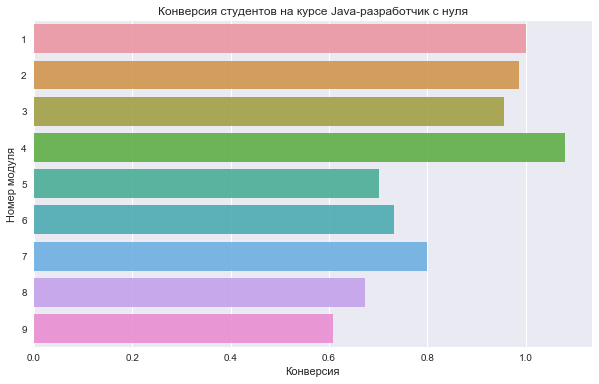

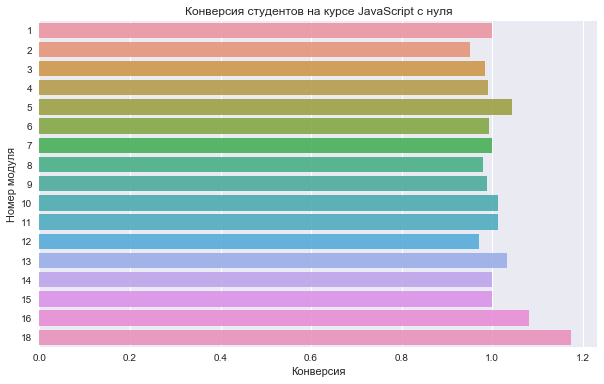

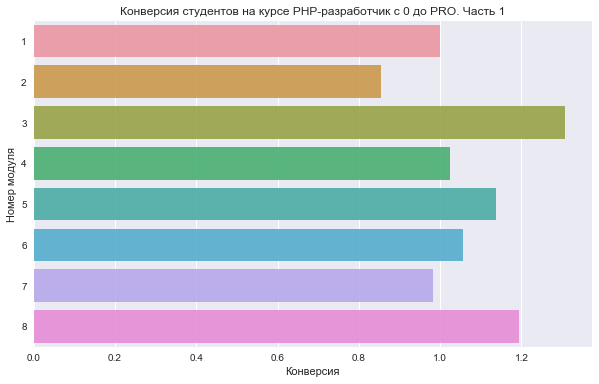

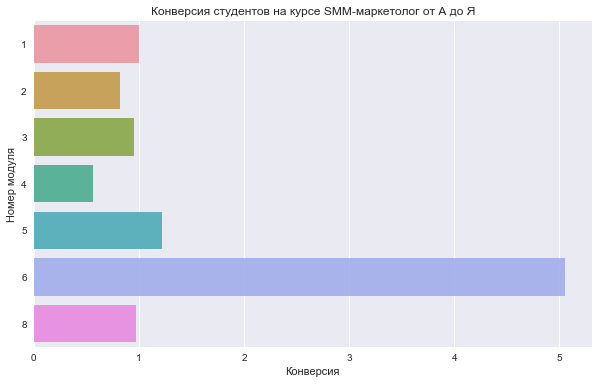

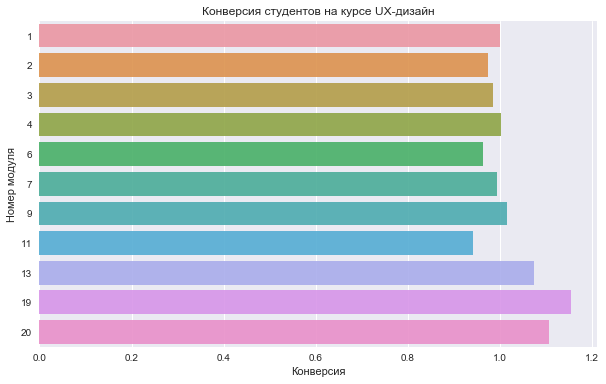

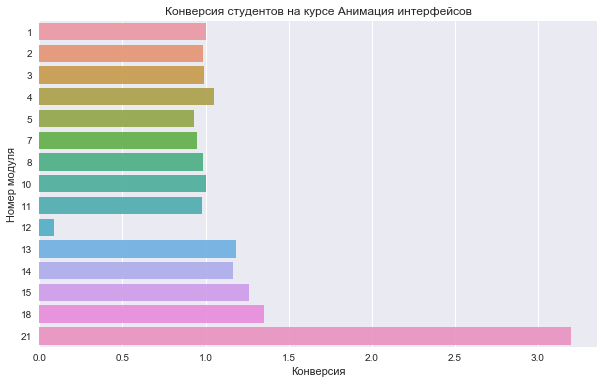

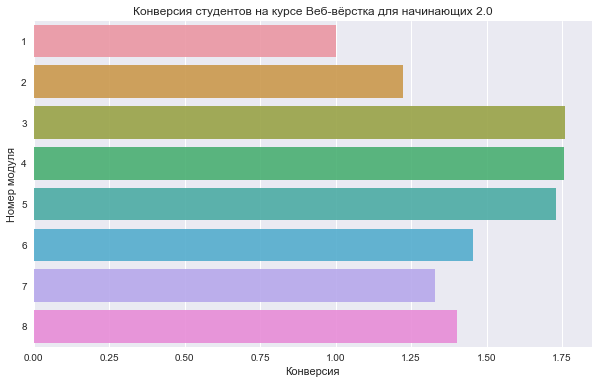

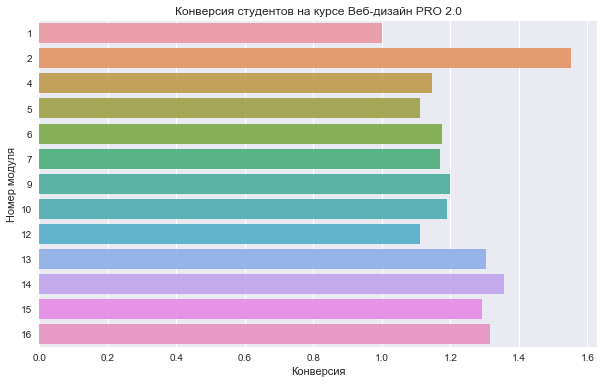

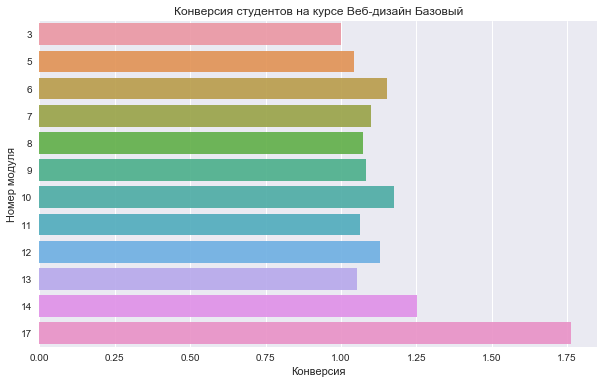

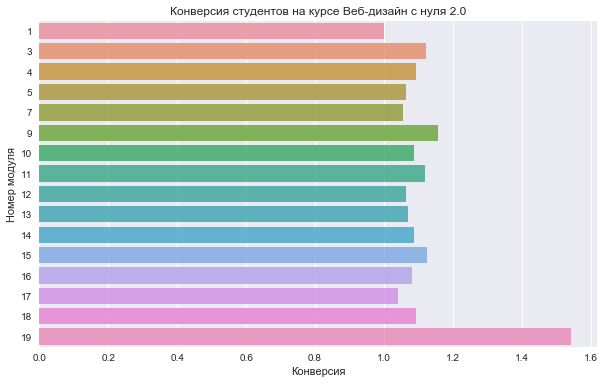

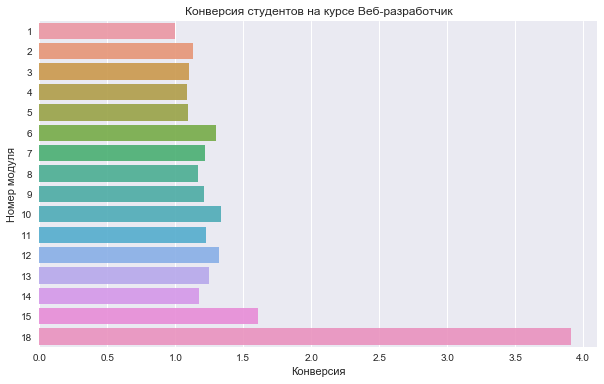

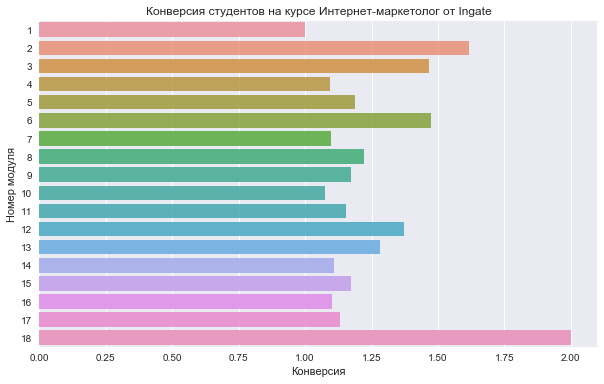

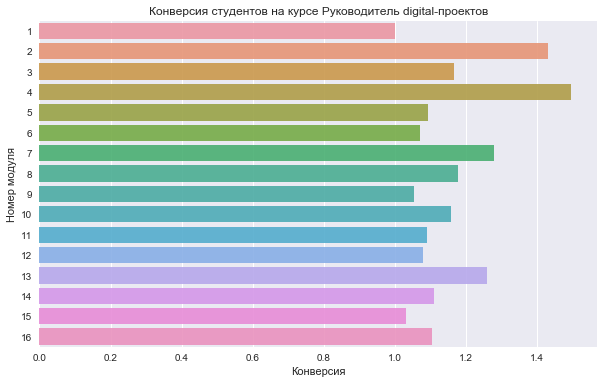

In [1451]:
for course in title_list:
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.barplot(data=df_final[df_final['title'] == course], x= 'conversion', y='module_number', ax=ax, alpha = 0.9)
    ax.set_title(f"Конверсия студентов на курсе {course}")
    ax.set_xlabel('Конверсия')
    ax.set_ylabel('Номер модуля')
    # ax.tick_params(axis = 'x', rotation = 90)
    sns.despine()
    plt.show()

Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [1452]:
#Второе решение-проверка. За первое ДЗ в модуле принимается то ДЗ, которое идет первым по программе обучения.
df_conv = df_conv.groupby(['title', 'module_number', 'student_id']).agg({'lesson_number': 'min'}).reset_index()
df_final_2 = df_conv.groupby(['title', 'module_number']).agg({'student_id': 'count'}).reset_index()
df_final_2 = df_final_2.rename(columns = {'student_id': 'start'})
df_conv_f = df[df['is_homework'] == True]
df_conv_f = df_conv_f.dropna()
df_conv_f = df_conv_f.groupby(['title', 'module_number', 'student_id']).agg({'lesson_number': 'max'}).reset_index()
df_conv_f = df_conv_f.groupby(['title', 'module_number']).agg({'student_id': 'count'}).reset_index()
df_final_2['finish'] = df_conv_f['student_id']
df_final_2
                                                        

,title,module_number,start,finish
0,Excel Базовый,1,518,458.0
1,Excel Базовый,2,434,406.0
2,Excel Базовый,3,398,387.0
3,Excel Базовый,4,345,303.0
4,Excel Базовый,5,298,270.0
...,...,...,...,...
186,Руководитель digital-проектов,12,95,69.0
187,Руководитель digital-проектов,13,87,64.0
188,Руководитель digital-проектов,14,71,64.0
189,Руководитель digital-проектов,15,66,58.0


In [1453]:
df_final_2['prev_finish_count'] = np.ones
for ind, row in df_final_2.iterrows():
    if row['module_number'] == 1:
        df_final_2['prev_finish_count'][ind] = df_final_2['start'][ind]
        prev = row['finish']
    else:
        df_final_2['prev_finish_count'][ind] = prev
        prev = row['finish']
        
df_final_2

,title,module_number,start,finish,prev_finish_count
0,Excel Базовый,1,518,458.0,518
1,Excel Базовый,2,434,406.0,458.0
2,Excel Базовый,3,398,387.0,406.0
3,Excel Базовый,4,345,303.0,387.0
4,Excel Базовый,5,298,270.0,303.0
...,...,...,...,...,...
186,Руководитель digital-проектов,12,95,69.0,88.0
187,Руководитель digital-проектов,13,87,64.0,69.0
188,Руководитель digital-проектов,14,71,64.0,64.0
189,Руководитель digital-проектов,15,66,58.0,64.0


In [1460]:
df_final_2.loc[113, 'prev_finish_count'] = 407 #Изменяем значение в том курсе, в котором ДЗ начинают выполнять не с первого модуля.
df_final_2[df_final_2['title'] == 'Веб-дизайн Базовый']

,title,module_number,start,finish,prev_finish_count,conversion
113,Веб-дизайн Базовый,3,407,324.0,407,1.149718
114,Веб-дизайн Базовый,5,338,278.0,324.0,1.04321
115,Веб-дизайн Базовый,6,321,249.0,278.0,1.154676
116,Веб-дизайн Базовый,7,274,232.0,249.0,1.100402
117,Веб-дизайн Базовый,8,249,212.0,232.0,1.073276
118,Веб-дизайн Базовый,9,230,181.0,212.0,1.084906
119,Веб-дизайн Базовый,10,213,172.0,181.0,1.176796
120,Веб-дизайн Базовый,11,183,155.0,172.0,1.063953
121,Веб-дизайн Базовый,12,175,149.0,155.0,1.129032
122,Веб-дизайн Базовый,13,157,122.0,149.0,1.053691


In [1461]:
df_final_2['conversion'] = df_final_2.start / df_final_2.prev_finish_count
df_final_2['module_number'] = df_final_2['module_number'].astype(str)
df_final_2

,title,module_number,start,finish,prev_finish_count,conversion
0,Excel Базовый,1,518,458.0,518,1.0
1,Excel Базовый,2,434,406.0,458.0,0.947598
2,Excel Базовый,3,398,387.0,406.0,0.980296
3,Excel Базовый,4,345,303.0,387.0,0.891473
4,Excel Базовый,5,298,270.0,303.0,0.983498
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,95,69.0,88.0,1.079545
187,Руководитель digital-проектов,13,87,64.0,69.0,1.26087
188,Руководитель digital-проектов,14,71,64.0,64.0,1.109375
189,Руководитель digital-проектов,15,66,58.0,64.0,1.03125


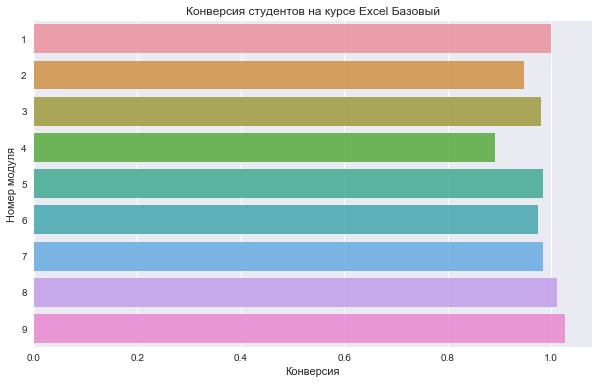

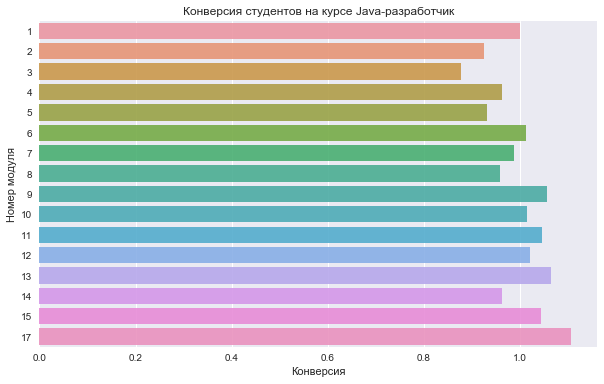

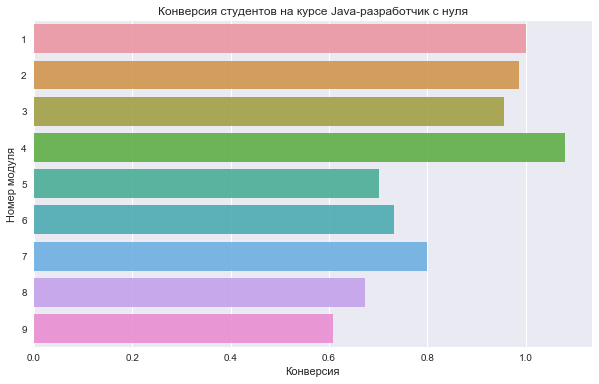

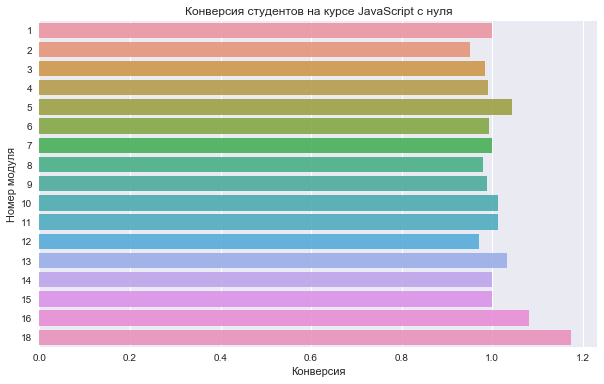

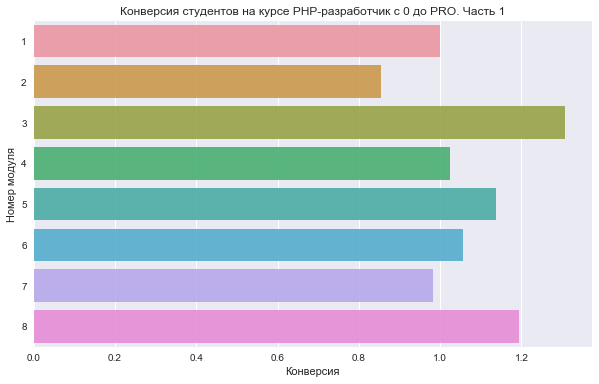

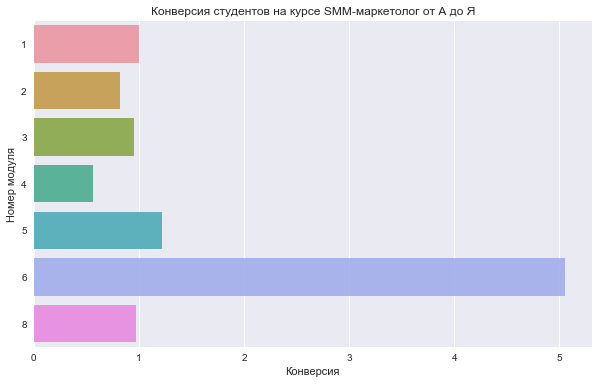

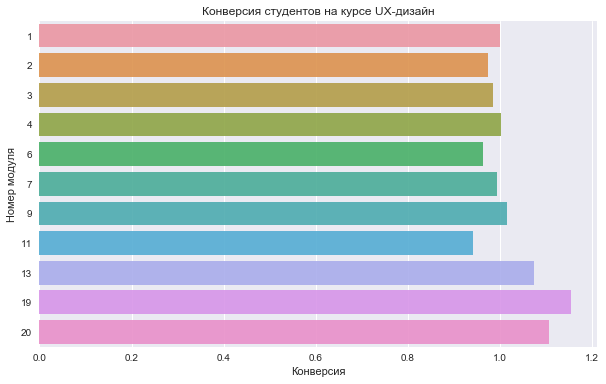

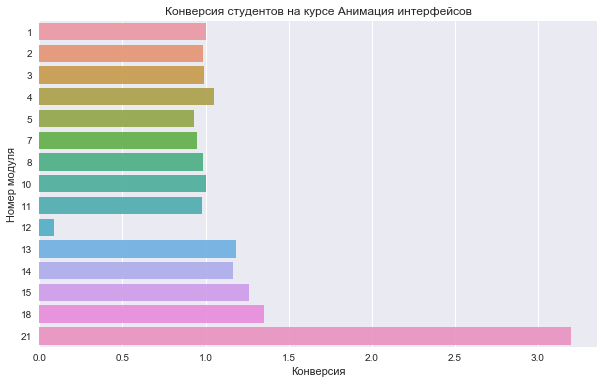

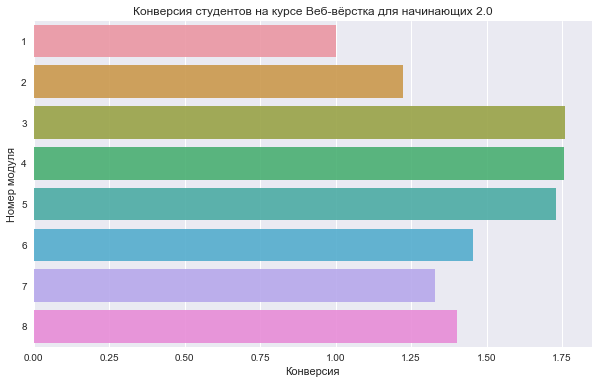

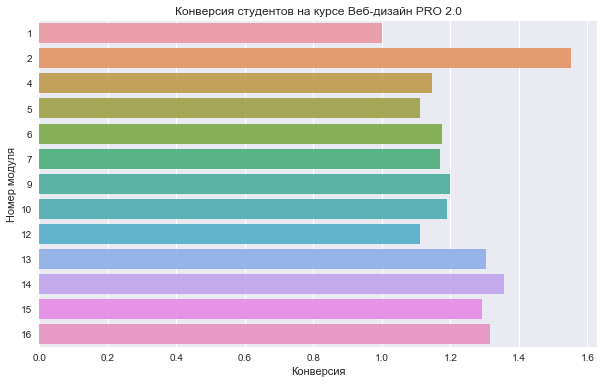

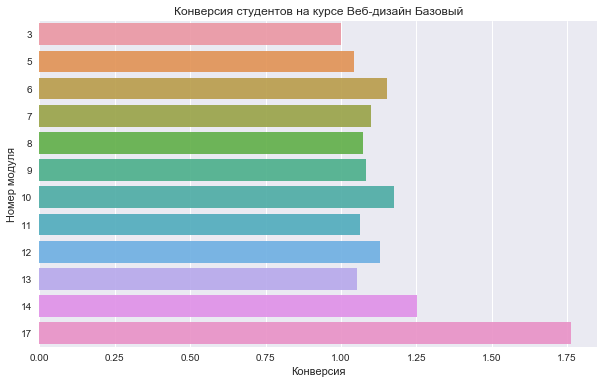

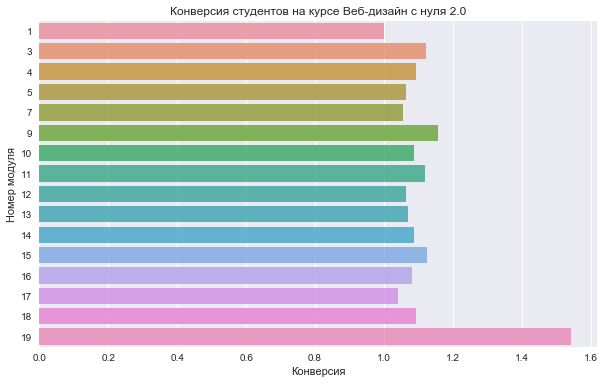

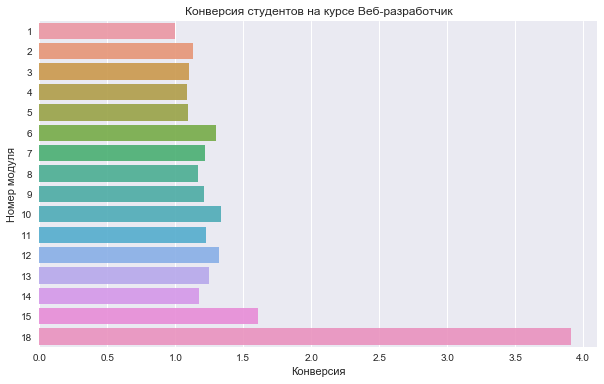

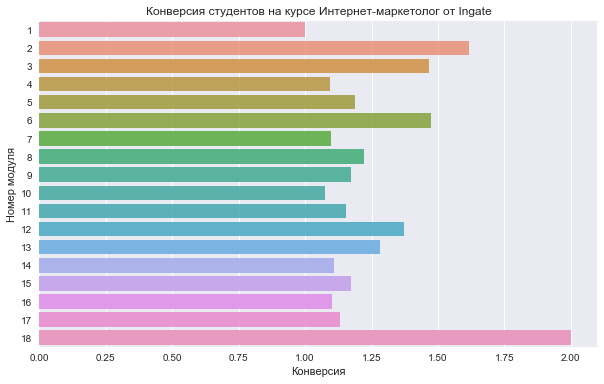

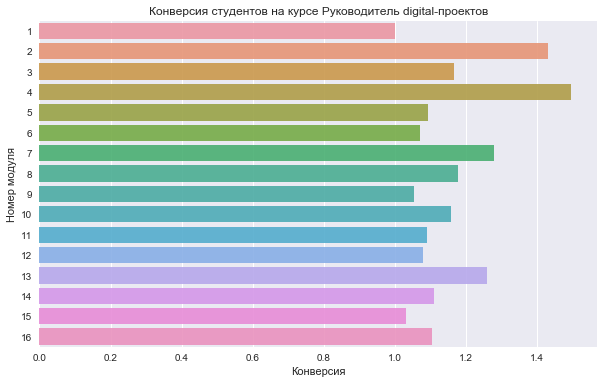

In [1462]:
for course in title_list:
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.barplot(data=df_final_2[df_final['title'] == course], x= 'conversion', y='module_number', ax=ax, alpha = 0.9)
    ax.set_title(f"Конверсия студентов на курсе {course}")
    ax.set_xlabel('Конверсия')
    ax.set_ylabel('Номер модуля')
    # ax.tick_params(axis = 'x', rotation = 90)
    sns.despine()
    plt.show()

In [1463]:
#Значения в столбцах "conversion" идентичны в двух разных латафреймах: df_final и df_final_2
df_final['compared'] = df_final['conversion'] == df_final_2['conversion']
df_final[df_final['compared'] == False]

,title,module_number,start_count,finish_count,prev_finish_count,conversion,compared


На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

На курсах "Excel Базовый", "Java-разработчик", "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "UX-дизайн" высокие значения конверсии студентов: от 0.87 до 1.3.
На курсе "Java-разработчик c нуля" видна регрессия конверсии студентов к последнему модулю: от 1 до 0.6.
На курсе "SMM-маркетолог от А до Я" низкая конверсия студентов в 4 модуле (0.56) и высокая - в 6 модуле (5.05), в остальных - от 0.8 до 1.2.
На курсе "Анимация интерфейсов" низкая конверсия в 12 модуле (~ 0.09) и высокая в 16 модуле (3.2).
На курсе "Веб-разработчик" конверсия во всех модулях от 1 до 1.6, в последнем модуле - 3.9.
На курсах "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0", "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Интернет-маркетолог от Ingate" и "Руководитель digital-проектов" во всех модулях, кроме первого, конверсия больше 1: от 1 до ~2.


## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [1310]:
### YOUR CODE HERE ###
# Интересно, что перечисленные причины связаны только со студентами. Не задумываясь долго, я могу назвать еще как минимум две причины: недостаточно проработанная методика курса, неправильная рекомендация менеджера по продаже курсов. 
#Первый пункт в метрике - количество невыполненных заданий.
df_stud = df.copy(deep=True)
df_stud = df_stud.fillna(1)
df_stud = df_stud[df_stud['finish_date'] == 1]
df_stud = df_stud.groupby('student_id').agg({'finish_date': 'sum'}).reset_index()
df_stud = df_stud[df_stud['finish_date'] > 1] #Можно выбирать, с какого количество невыполненных заданий брать студента "на карандаш".
df_stud #Больше одного невыполненного задания


,student_id,finish_date
0,000333b6aa5706c53f4d2ec24c7a128d,3
1,0007e271c3f2f20ff8675df9d81e0401,2
4,00386b771938472b2df62108f5985c1e,4
5,00647ca62c6f122f9116f4b59157d26a,3
6,0066366dd4098a6ab35fa7eccc0b300a,6
...,...,...
8507,ffb687843c211c094de229b2fb9bbfbe,3
8509,ffbad9db3d1288fcf3e2aee46ffd1fa7,2
8513,ffcab072956be8f20917dddb726be5ad,2
8515,ffd7a91bcf8acfe1afd2e74c7374cf23,2


In [1470]:
#Второй пункт в метрике - время выполнения домашних заданий.
df_homework.reset_index()
df_stud_problem_2 = df_homework[df_homework['time_of_hw'] > '10 days'].reset_index() #Создаем новую таблицу, в которой будут только те случаи, когда ДЗ выполняется дольше десяти дней.
df_stud_problem_2 = df_stud_problem_2.groupby(['title', 'student_id']).agg({'time_of_hw': 'count'}) #Группируем по названию курсов и id студентов, считаем количество случаев, когда у одного студента ДЗ выполняется дольше 10 дней.
df_stud_problem_2[df_stud_problem_2['time_of_hw'] > 5] #Насколько регулярно студенты затягивают с выполнением ДЗ? Отбираем тех студентов, кто около пяти раз выполнял ДЗ дольше 10 дней. 


time_of_hw
title                         student_id                                  
Java-разработчик              04a3cb4ff333bb254c8044ba49ff2aa4           7
                              085d7992c51dee257c8efa107b0fd90d           7
                              0b4656b84ca60350583f8fbe236dda86           6
                              1d92f567d0efa5ce14440ba0a2f862d0           9
                              20165d40da3f747e99af33ff20c7fdb1           6
...                                                                    ...
Руководитель digital-проектов dfb6458b5420fcfeb223e82694b1ebf9           7
                              dff546586b4cce6a6d330bfa588d122c           7
                              e3cf05b76236f033304bb99fe2bb7bbd          10
                              f330a360d44365bbf0c3bce70740efba           6
                              f7a31abd39423a8345067f8c96644864           9

[510 rows x 1 columns]